In [1]:
#IMPORTS

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.multitest import fdrcorrection


In [2]:
#pull data into dfs from excel

full_analysis_df = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_hartland_removed.xlsx')
#full_analysis_df_w_hartland = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
emotions_mean_by_ida = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/emotion_means_by_id.xlsx')
#full_analysis_df = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
#emotions_mean_by_ida = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/emotion_means_by_id.xlsx')
display(full_analysis_df)

,Unnamed: 0,start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,...,q49_48,q49_49,q49_50,q51_1,q51_2,q51_3,q51_4,q51_5,q51_6,q51_7
0,0,2024-04-05 14:12:54,2024-04-05 15:57:31,IP Address,155.98.131.1,100.0,6276.0,1.0,2024-04-05 15:57:31,R_2dPUXEtypfBvZhD,...,A little bit,Not at all,Not at all,A lot,A lot,A lot,A lot,A little bit,Moderately,A lot
1,1,2024-03-13 18:59:27,2024-03-13 20:15:18,IP Address,155.98.131.5,100.0,4550.0,1.0,2024-03-13 20:15:19,R_7PAooFY6nTwIqA7,...,A little bit,Not at all,Not at all,A great deal,A great deal,A great deal,Moderately,Not at all,Moderately,A lot
2,2,2024-03-23 13:49:19,2024-04-03 19:27:57,IP Address,155.98.131.5,100.0,970717.0,1.0,2024-04-03 19:27:58,R_73AteLV2ZE5L4GJ,...,A lot,Moderately,A lot,Moderately,A little bit,A little bit,A little bit,A little bit,Moderately,A little bit
3,3,2024-01-26 15:51:59,2024-01-26 16:41:06,IP Address,155.98.131.2,100.0,2946.0,1.0,2024-01-26 16:41:06,R_3uP2DqVWkGDu8La,...,Extremely,Moderately,Not at all,Moderately,A lot,A great deal,Moderately,A little bit,Moderately,Moderately
4,4,2024-01-24 16:32:42,2024-01-24 19:27:07,IP Address,155.98.131.2,100.0,10464.0,1.0,2024-01-24 19:27:07,R_7OiAhfM2TEkyQdM,...,A lot,Moderately,Not at all,Not at all,Not at all,Not at all,Not at all,A little bit,Not at all,Not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,186,2024-04-06 14:34:46,2024-04-06 15:31:05,IP Address,155.98.131.5,100.0,3378.0,1.0,2024-04-06 15:31:05,R_3fNzlkOukIhRV9V,...,Not at all,Moderately,Not at all,A great deal,A great deal,A great deal,A great deal,A little bit,A great deal,A great deal
160,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
display(emotions_mean_by_ida)

,ida,afraid_scared,angry_frustrated,anxious,guilty,happy,hopeless,indifferent,inspired,interested,numb,optimistic_hopeful,sad,stressed
0,24012401BF,1.00,0.75,1.00,0.50,0.75,0.25,0.25,1.00,1.50,0.00,1.25,0.75,0.75
1,24012401MG,0.00,0.25,0.25,0.00,0.50,0.25,0.25,0.75,2.25,0.50,1.75,0.50,0.00
2,24012401PM,0.75,1.25,1.00,1.00,1.00,0.25,0.50,1.50,2.00,0.00,2.00,1.00,1.00
3,24012601LS,0.75,1.00,0.00,0.75,1.00,0.50,0.00,1.00,2.00,1.00,2.50,1.00,1.00
4,24012601RS,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.50,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,24040610EC,0.00,0.00,0.25,0.00,1.50,0.00,0.50,1.00,2.25,0.00,1.75,0.25,0.50
155,24040610MC,1.00,0.75,0.50,0.00,0.50,1.00,0.75,0.25,1.50,0.00,1.00,1.00,0.50
156,24040610OW,1.50,1.25,1.25,1.00,0.75,1.50,0.50,0.75,2.25,1.00,1.00,1.25,1.00
157,24040611KS,1.25,1.50,0.50,0.25,1.50,1.50,0.25,1.50,2.50,0.25,1.50,1.00,0.25


In [4]:
# Merge age, SASSY, rural/urban, and UT columns into avg emot dataframe
emotions_mean_by_ida = emotions_mean_by_ida.merge(
    full_analysis_df[['ida', 'age', 'SASSY', 'rural/urban', 'UT?']], 
    on='ida', 
    how='outer'
) 
display(emotions_mean_by_ida)

,ida,afraid_scared,angry_frustrated,anxious,guilty,happy,hopeless,indifferent,inspired,interested,numb,optimistic_hopeful,sad,stressed,age,SASSY,rural/urban,UT?
0,24012401BF,1.00,0.75,1.00,0.50,0.75,0.25,0.25,1.00,1.50,0.00,1.25,0.75,0.75,23.0,Alarmed,1.0,0.0
1,24012401MG,0.00,0.25,0.25,0.00,0.50,0.25,0.25,0.75,2.25,0.50,1.75,0.50,0.00,23.0,Cautious,1.0,0.0
2,24012401PM,0.75,1.25,1.00,1.00,1.00,0.25,0.50,1.50,2.00,0.00,2.00,1.00,1.00,22.0,Alarmed,3.0,0.0
3,24012601LS,0.75,1.00,0.00,0.75,1.00,0.50,0.00,1.00,2.00,1.00,2.50,1.00,1.00,63.0,Concerned,1.0,1.0
4,24012601RS,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.50,0.25,0.00,59.0,Doubtful,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,24040611MM,1.00,2.25,0.75,0.00,0.50,1.00,0.25,2.00,2.75,0.25,1.00,1.25,0.50,20.0,Cautious,1.0,1.0
160,24040612JC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,24040612KC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,24040612LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preliminary Tests

In [5]:
# Test normality and homogeneity of variance for each emotion

#get emotion columns
emotion_cols = [col for col in emotions_mean_by_ida.columns if col not in ['ida', 'age', 'SASSY', 'rural/urban', 'UT?']]

# Shapiro-Wilk test for normality
print("\nShapiro-Wilk Normality Test Results:")
print("-" * 50)
normality_results = []
for emotion in emotion_cols:
    # Drop NaN values before testing
    valid_data = emotions_mean_by_ida[emotion].dropna()
    stat, p_value = stats.shapiro(valid_data)
    normality_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'normal': p_value > 0.05
    })
    
normality_df = pd.DataFrame(normality_results)
display(normality_df)

# Levene's test for homogeneity of variance
print("\nLevene's Test Results:")
print("-" * 50)
levene_results = []

# For Levene's test, we'll compare variances between all emotion columns
for i, emotion1 in enumerate(emotion_cols):
    for emotion2 in emotion_cols[i+1:]:
        # Create mask to identify rows where both emotions have values
        mask = ~(emotions_mean_by_ida[emotion1].isna() | emotions_mean_by_ida[emotion2].isna())
        # Apply test only on rows with valid data for both emotions
        stat, p_value = stats.levene(emotions_mean_by_ida.loc[mask, emotion1], 
                                   emotions_mean_by_ida.loc[mask, emotion2])
        levene_results.append({
            'emotion_pair': f"{emotion1} vs {emotion2}",
            'statistic': stat,
            'p_value': p_value,
            'equal_variance': p_value > 0.05
        })

levene_df = pd.DataFrame(levene_results)
display(levene_df)


Shapiro-Wilk Normality Test Results:
--------------------------------------------------


,emotion,statistic,p_value,normal
0,afraid_scared,0.902323,8.466339e-09,False
1,angry_frustrated,0.915406,5.370407e-08,False
2,anxious,0.927704,3.588542e-07,False
3,guilty,0.867216,1.156572e-10,False
4,happy,0.963103,3.052077e-04,False
5,hopeless,0.908321,1.935675e-08,False
6,indifferent,0.877509,4.096580e-10,False
7,inspired,0.973473,3.718092e-03,False
8,interested,0.940392,3.126328e-06,False
9,numb,0.748709,3.364113e-15,False



Levene's Test Results:
--------------------------------------------------


,emotion_pair,statistic,p_value,equal_variance
0,afraid_scared vs angry_frustrated,1.225902,0.269048,True
1,afraid_scared vs anxious,0.682727,0.409273,True
2,afraid_scared vs guilty,0.001585,0.968264,True
3,afraid_scared vs happy,4.281540,0.039341,False
4,afraid_scared vs hopeless,0.025485,0.873265,True
...,...,...,...,...
73,numb vs sad,6.310404,0.012501,False
74,numb vs stressed,9.771554,0.001937,False
75,optimistic_hopeful vs sad,2.327880,0.128075,True
76,optimistic_hopeful vs stressed,0.386382,0.534656,True


### Age vs Avg Emotions

In [6]:
# Run both Pearson and Spearman correlations to compare age and average emotions

#loop through all emotions and run correlation
results = []
for emotion in emotion_cols:
    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[['age', emotion]].dropna()

    pearson = stats.pearsonr(data_subset['age'], data_subset[emotion])
    spearman = stats.spearmanr(data_subset['age'], data_subset[emotion])

    results.append({
        'emotion': emotion,
        'pearson_r': pearson[0],
        'pearson_p': pearson[1],
        'spearman_r': spearman[0],
        'spearman_p': spearman[1]
    })

results_df = pd.DataFrame(results)
display(results_df)

,emotion,pearson_r,pearson_p,spearman_r,spearman_p
0,afraid_scared,-0.053518,0.502860,-0.113935,0.152720
1,angry_frustrated,0.048639,0.542631,0.066669,0.403736
2,anxious,-0.116695,0.142956,-0.143200,0.071745
3,guilty,-0.166957,0.035429,-0.186323,0.018696
4,happy,-0.145391,0.067464,-0.130303,0.101613
5,hopeless,-0.039710,0.619214,-0.061969,0.437763
6,indifferent,-0.131829,0.098715,-0.151526,0.057365
7,inspired,-0.021948,0.783623,-0.013636,0.864538
8,interested,0.075822,0.342162,0.076831,0.335755
9,numb,-0.001061,0.989410,-0.024596,0.758282


### Gender vs Avg Emotions

In [7]:
# Mann-Whitney U test to compare emotions between genders
# ****** No significant results *****
print("\nMann-Whitney U Test Results for Gender Differences:")
print("-" * 50)

mw_results = []
for emotion in emotion_cols:
    # Get emotion scores for each gender
    male_scores = emotions_mean_by_ida[emotion][full_analysis_df['gender'] == 'Male'].dropna()
    female_scores = emotions_mean_by_ida[emotion][full_analysis_df['gender'] == 'Female'].dropna()
    
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(male_scores, female_scores, alternative='two-sided')
    
    mw_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

mw_results_df = pd.DataFrame(mw_results)
display(mw_results_df)



Mann-Whitney U Test Results for Gender Differences:
--------------------------------------------------


,emotion,statistic,p_value,significant
0,afraid_scared,2913.5,0.889059,False
1,angry_frustrated,2794.5,0.564236,False
2,anxious,2919.0,0.905289,False
3,guilty,2805.0,0.585993,False
4,happy,2723.5,0.405384,False
5,hopeless,3055.0,0.706524,False
6,indifferent,3152.0,0.381098,False
7,inspired,2612.0,0.216939,False
8,interested,2732.0,0.422140,False
9,numb,2805.0,0.565994,False


### SASSY vs Avg Emotions

In [8]:
#set SASSY order
emotions_mean_by_ida['SASSY'] = pd.Categorical(
        emotions_mean_by_ida['SASSY'],
        categories=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
        ordered=True
)

In [9]:
# Run spearman test on sassy vs average emots
spearman_results = []
for emotion in emotion_cols:

    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY']].dropna()
    data_subset['SASSY'] = data_subset['SASSY'].cat.codes

    # Perform Spearman rank correlation test
    spearman_corr, spearman_p = stats.spearmanr(data_subset['SASSY'], data_subset[emotion])
    
    spearman_results.append({
        'emotion': emotion,
        'spearman_corr': spearman_corr,
        'spearman_p': round(spearman_p, 6),  # Round to 6 decimal places
        'significant': spearman_p < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
spearman_results_df = pd.DataFrame(spearman_results)
spearman_results_df = spearman_results_df.sort_values(by='spearman_p')
display(spearman_results_df)

,emotion,spearman_corr,spearman_p,significant
1,angry_frustrated,0.461926,0.000000,True
5,hopeless,0.429072,0.000000,True
12,stressed,0.418272,0.000000,True
11,sad,0.448989,0.000000,True
2,anxious,0.386967,0.000001,True
0,afraid_scared,0.374815,0.000002,True
3,guilty,0.367454,0.000003,True
9,numb,0.252350,0.001773,True
8,interested,0.231851,0.004177,True
6,indifferent,-0.148067,0.070566,False


In [10]:
# Run FDR correction on SASSY vs Emotions Spearman Test results
# Get p-values in the sorted order
p_values = spearman_results_df['spearman_p'].values

# Apply FDR correction
rejected, corrected_p_values = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add corrected p-values to the dataframe
spearman_results_df['corrected_p'] = [round(p, 6) for p in corrected_p_values]
spearman_results_df['significant_fdr'] = rejected

# Display results
display(spearman_results_df)

,emotion,spearman_corr,spearman_p,significant,corrected_p,significant_fdr
1,angry_frustrated,0.461926,0.000000,True,0.000000,True
5,hopeless,0.429072,0.000000,True,0.000000,True
12,stressed,0.418272,0.000000,True,0.000000,True
11,sad,0.448989,0.000000,True,0.000000,True
2,anxious,0.386967,0.000001,True,0.000003,True
0,afraid_scared,0.374815,0.000002,True,0.000004,True
3,guilty,0.367454,0.000003,True,0.000006,True
9,numb,0.252350,0.001773,True,0.002881,True
8,interested,0.231851,0.004177,True,0.006033,True
6,indifferent,-0.148067,0.070566,False,0.091736,False


C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

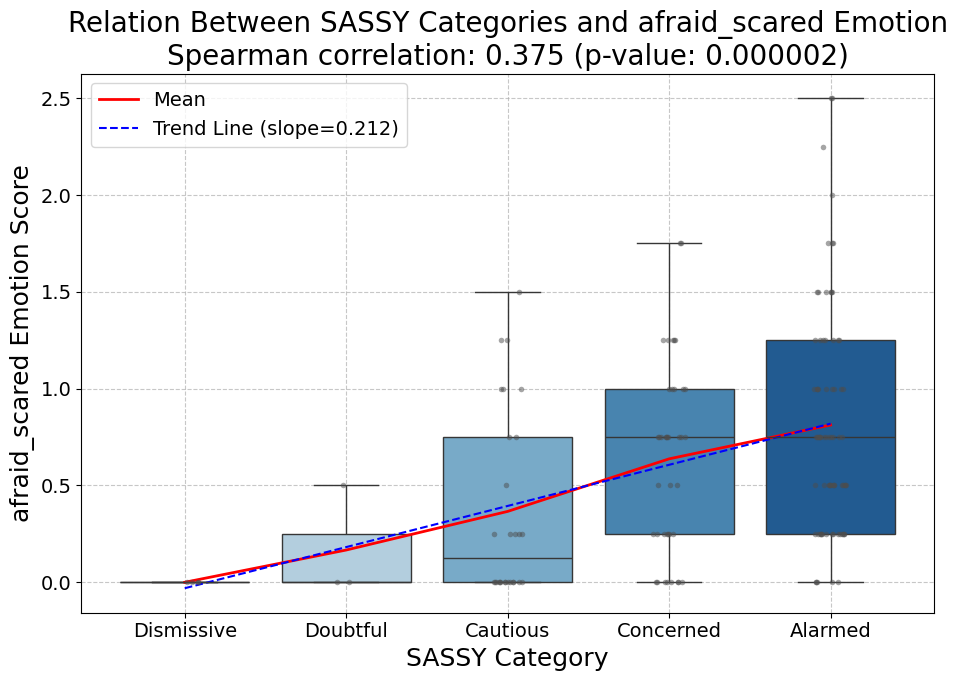

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

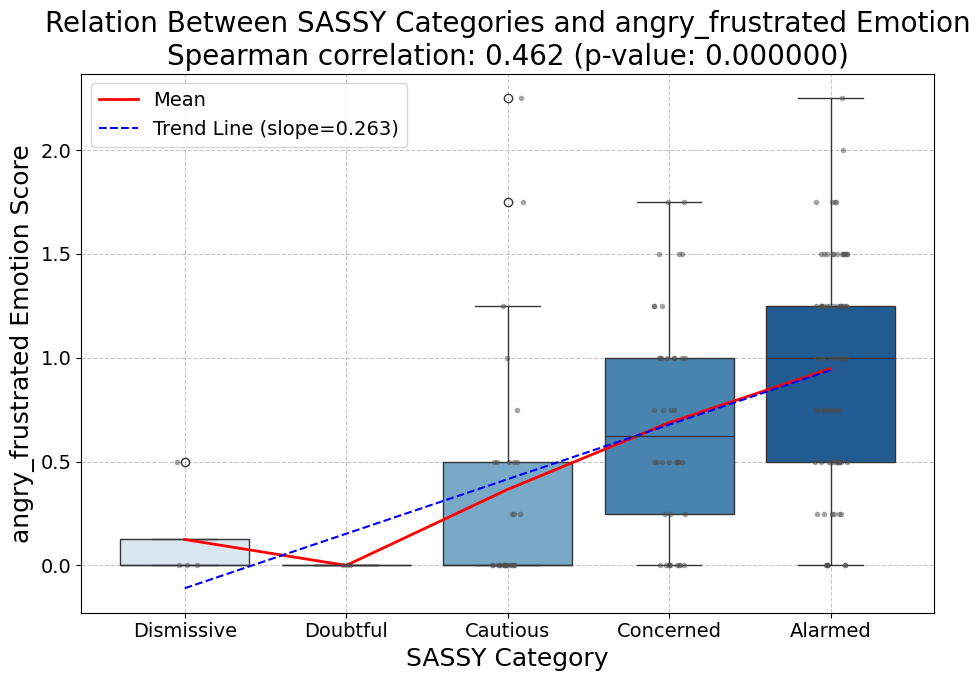

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

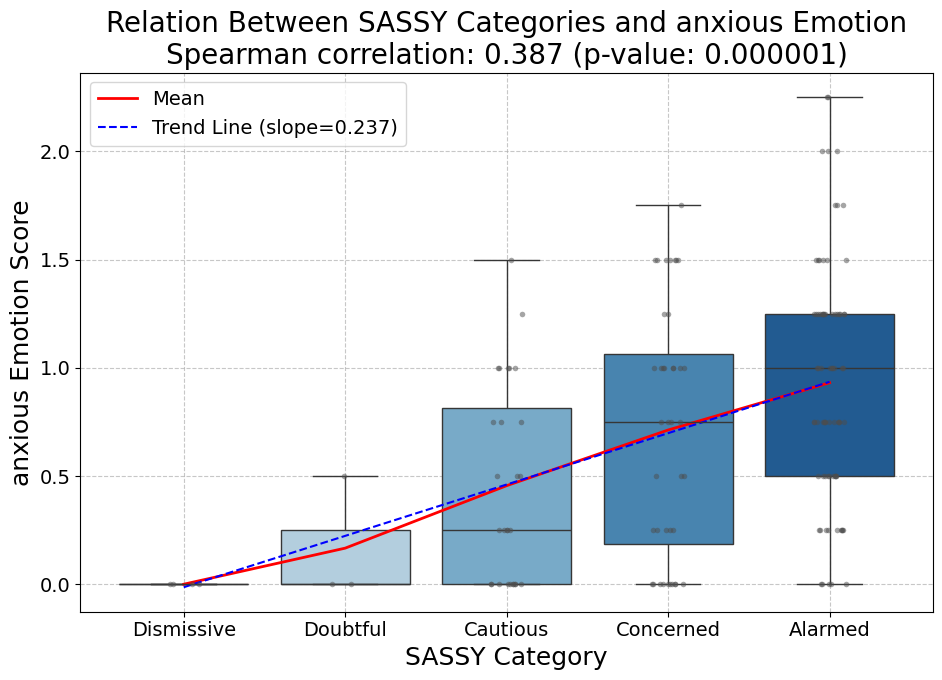

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

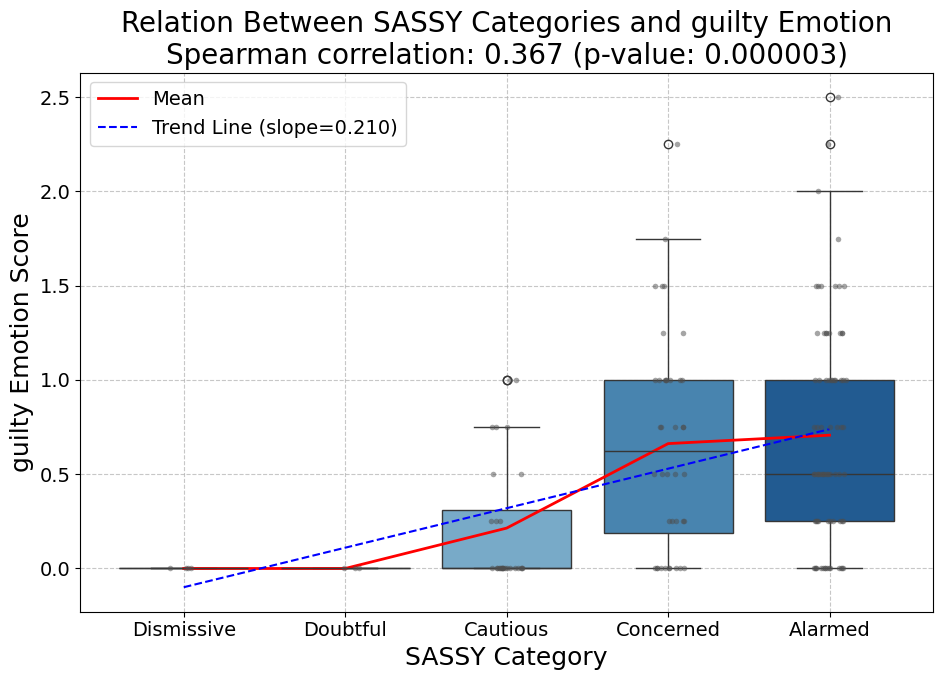

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

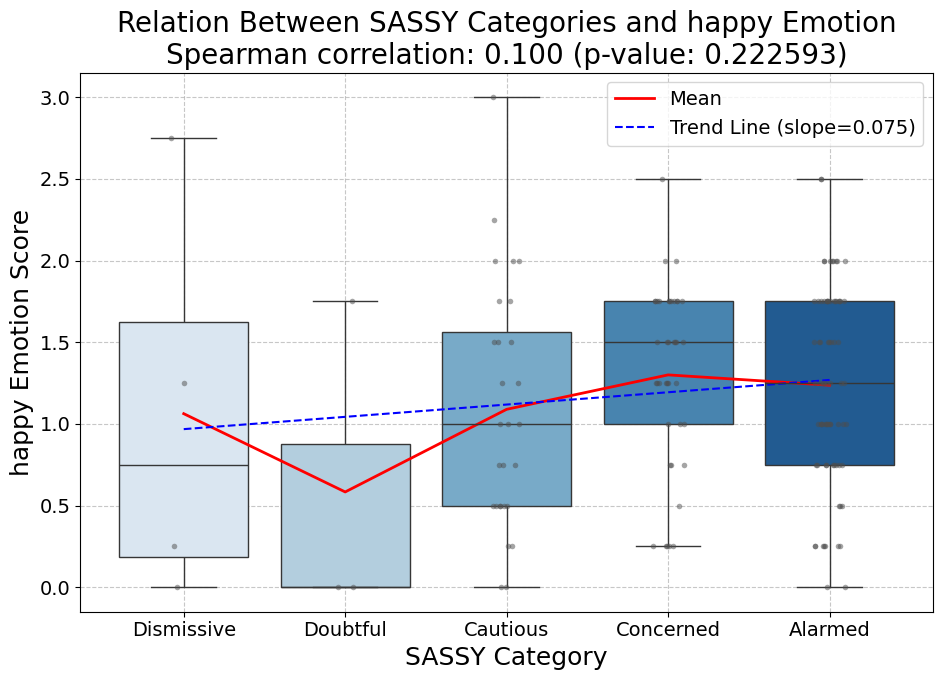

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

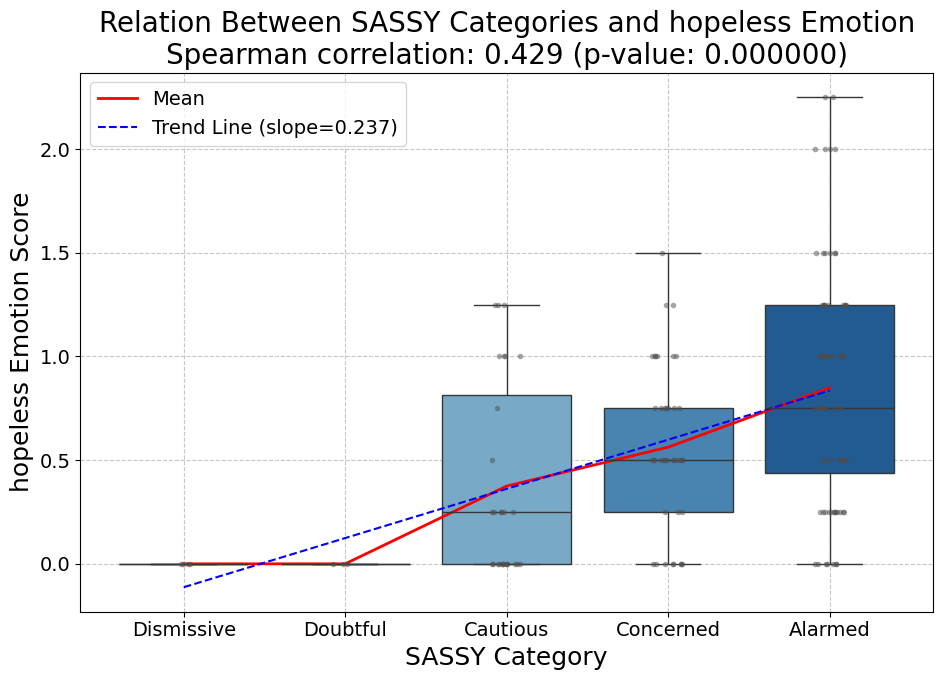

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

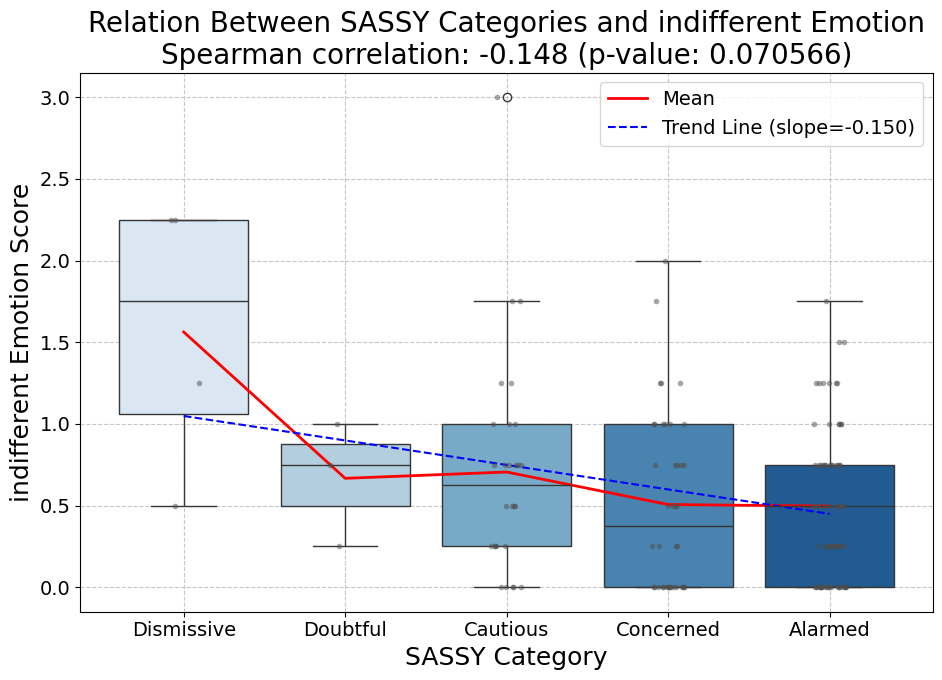

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

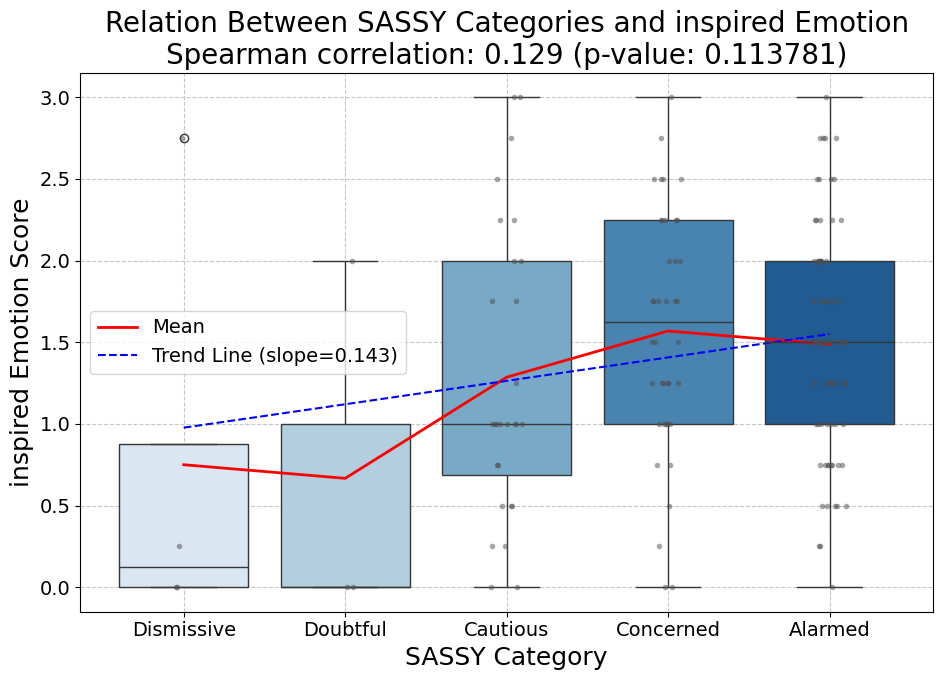

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

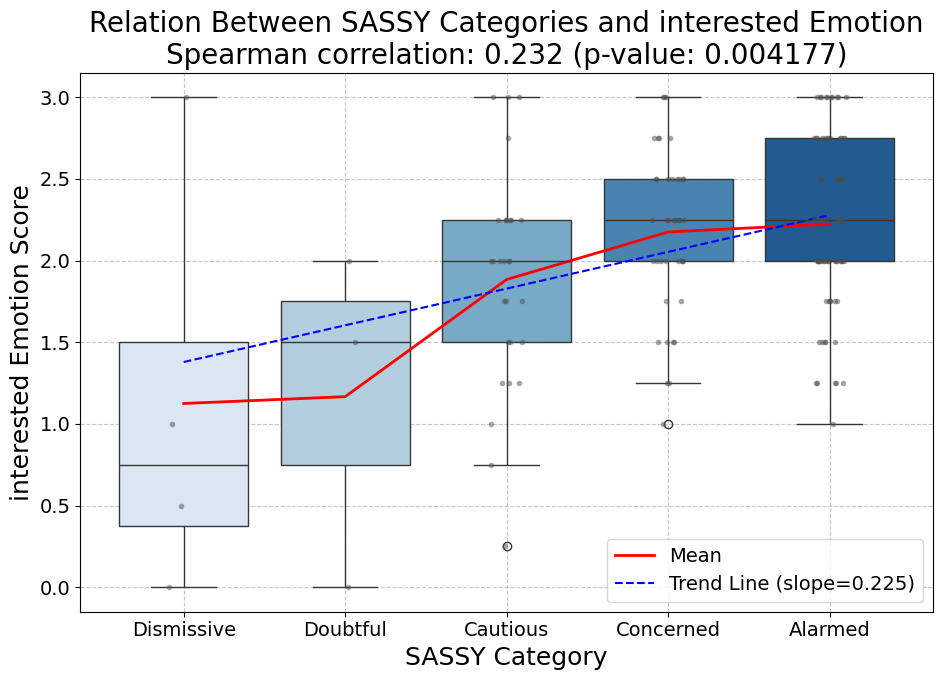

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

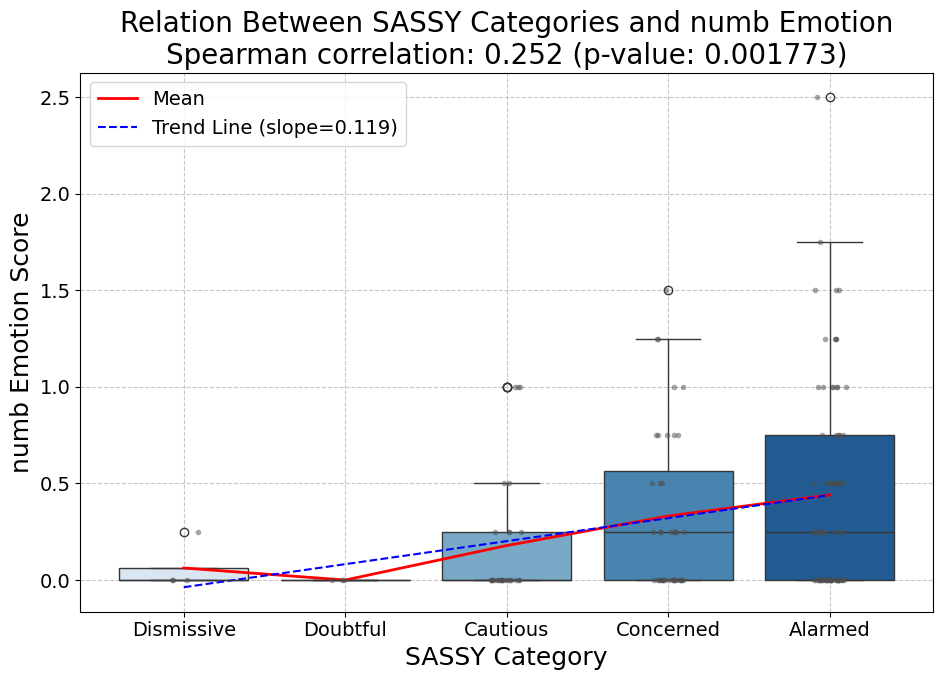

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

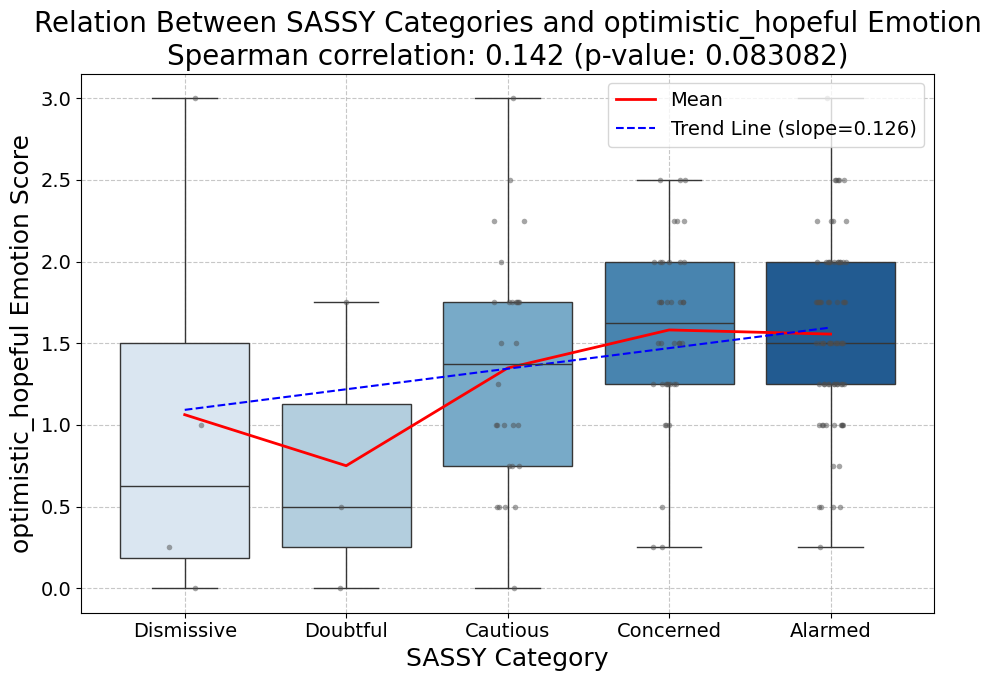

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

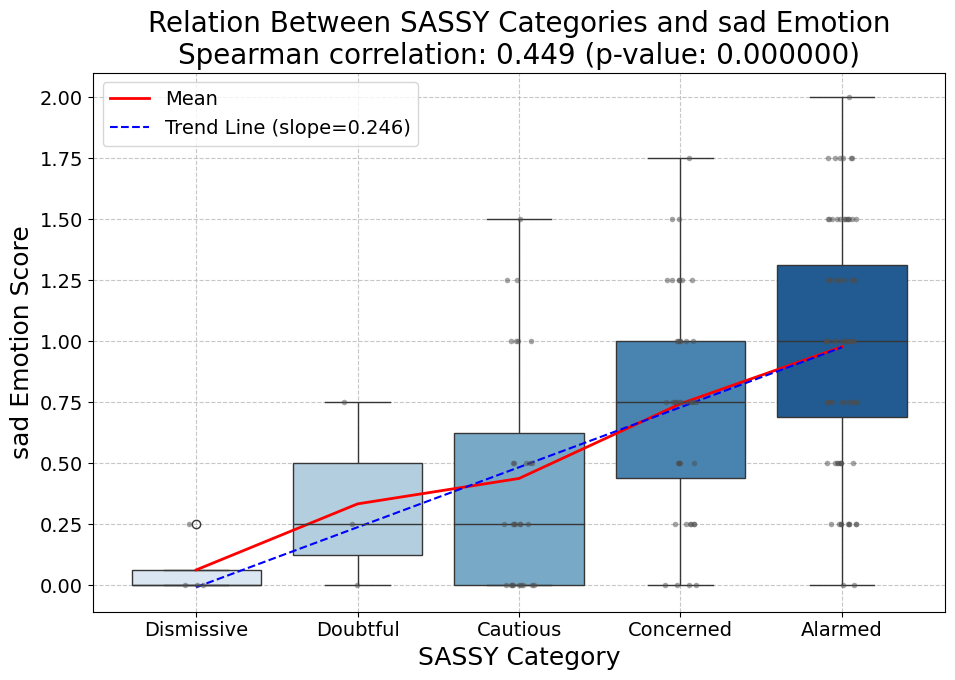

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2369513249.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

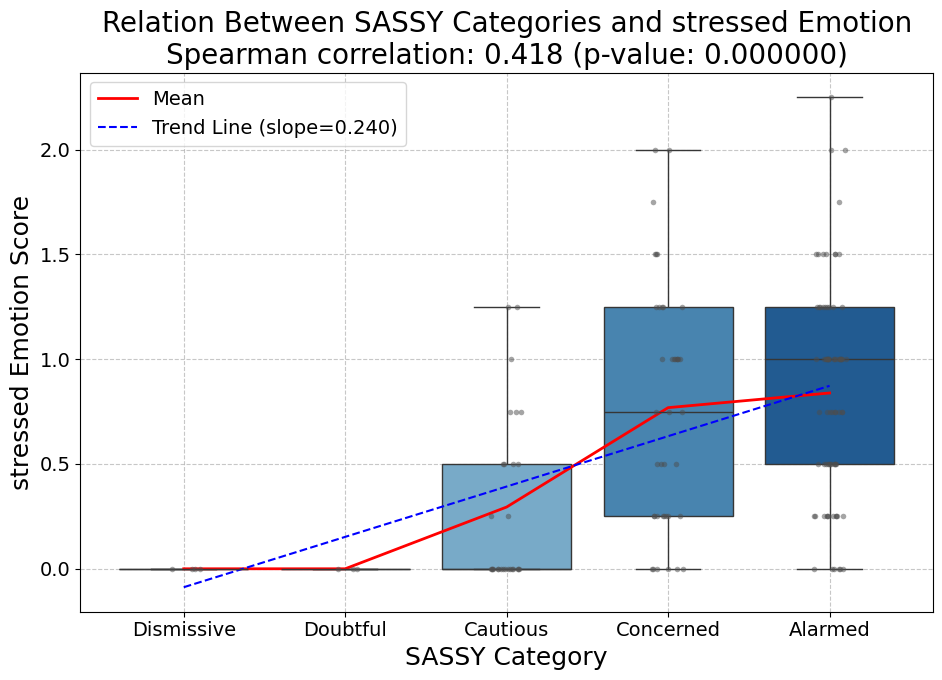

In [11]:
# Plot all emotions vs Sassy

# Loop through each emotion to plot
for emotion in emotion_cols:
    # Setup the figure with a larger size for better visibility
    plt.figure(figsize=(11, 7))

    # Create a box plot to show distribution of the current emotion across SASSY categories
    ax = sns.boxplot(x='SASSY', y=emotion, data=emotions_mean_by_ida, 
                     order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                     palette='Blues')

    # Add individual data points for more detail (jittered to avoid overlap)
    sns.stripplot(x='SASSY', y=emotion, data=emotions_mean_by_ida,
                  order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                  jitter=True, size=4, color='0.3', alpha=0.5)

    # Calculate the mean for each category to add a line connecting them
    means = emotions_mean_by_ida.groupby('SASSY')[emotion].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
    x_positions = range(len(means))
    plt.plot(x_positions, means.values, 'r-', linewidth=2, label='Mean')

    # Add correlation information to the plot
    corr_value = spearman_results_df[spearman_results_df['emotion'] == emotion]['spearman_corr'].values[0]
    p_value = spearman_results_df[spearman_results_df['emotion'] == emotion]['spearman_p'].values[0]

    # Add a title with correlation information
    plt.title(f'Relation Between SASSY Categories and {emotion} Emotion\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
              fontsize=20)

    # Label the axes
    plt.xlabel('SASSY Category', fontsize=18)
    plt.ylabel(f'{emotion} Emotion Score', fontsize=18)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

    # Add a trend line (regression line)
    # Get numeric codes for categories (0, 1, 2, 3, 4)
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY']].dropna()
    data_subset['SASSY'] = data_subset['SASSY'].cat.codes
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_subset['SASSY'], data_subset[emotion])
    x_line = np.array([0, 1, 2, 3, 4])
    y_line = intercept + slope * x_line
    plt.plot(x_line, y_line, 'b--', label=f'Trend Line (slope={slope:.3f})')

    # Add a legend
    plt.legend(fontsize=14)

    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust the layout
    #plt.tight_layout()

    # Display the plot
    plt.show()

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\1884603810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\1884603810.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')['sad'].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])


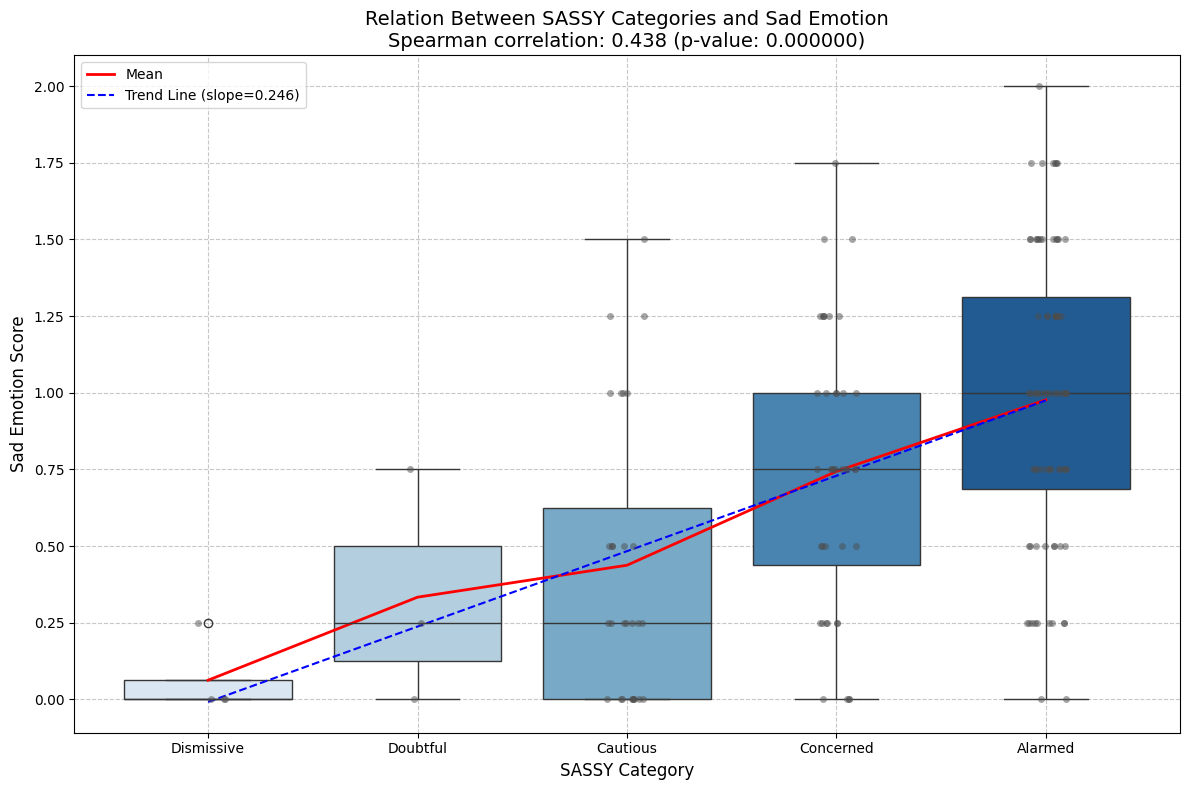

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\1884603810.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SASSY', y='sad', data=emotions_mean_by_ida,


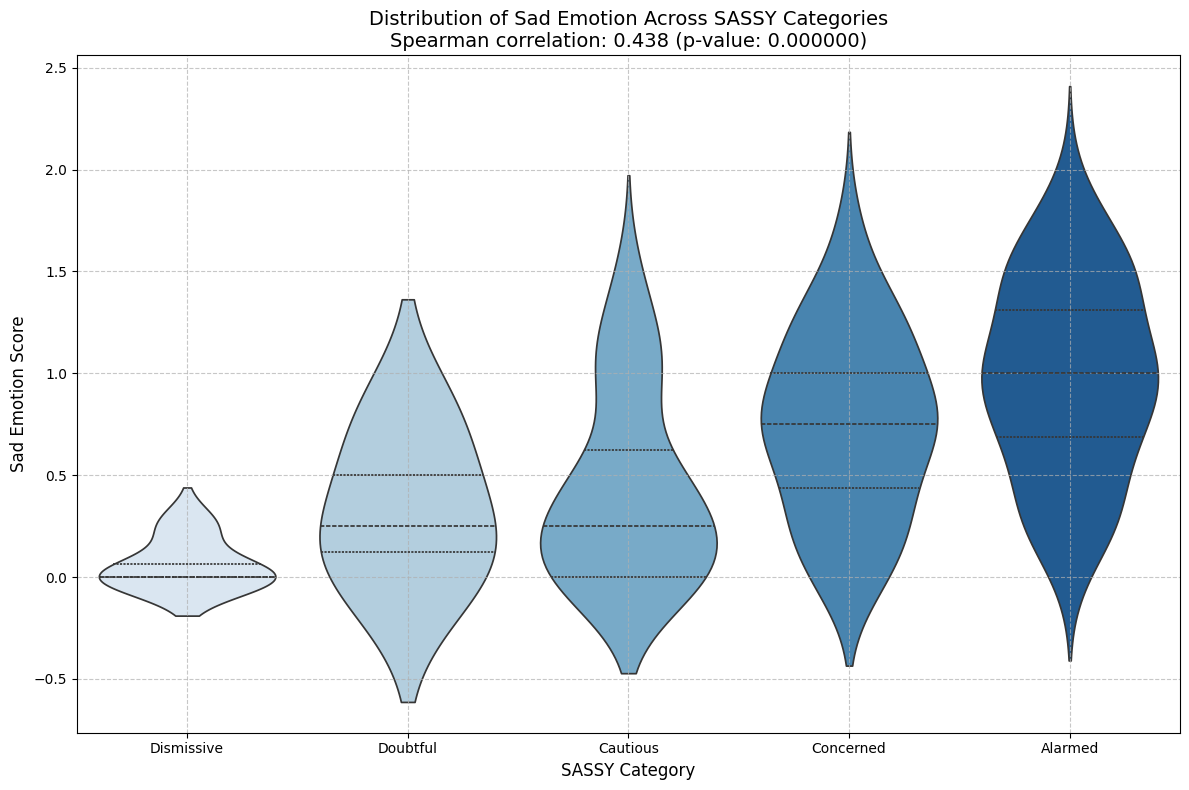

In [12]:
#plot sad vs Sassy 

# Setup the figure with a larger size for better visibility
plt.figure(figsize=(12, 8))

# Create a box plot to show distribution of 'sad' across SASSY categories
ax = sns.boxplot(x='SASSY', y='sad', data=emotions_mean_by_ida, 
                 order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                 palette='Blues')

# Add individual data points for more detail (jittered to avoid overlap)
sns.stripplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
              order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
              jitter=True, size=5, color='0.3', alpha=0.5)

# Calculate the mean for each category to add a line connecting them
means = emotions_mean_by_ida.groupby('SASSY')['sad'].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
x_positions = range(len(means))
plt.plot(x_positions, means.values, 'r-', linewidth=2, label='Mean')

# Add correlation information to the plot
corr_value = 0.438  # From your results
p_value = 0.000000   # From your results

# Add a title with correlation information
plt.title(f'Relation Between SASSY Categories and Sad Emotion\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
          fontsize=14)

# Label the axes
plt.xlabel('SASSY Category', fontsize=12)
plt.ylabel('Sad Emotion Score', fontsize=12)

# Add a trend line (regression line)
# Get numeric codes for categories (0, 1, 2, 3, 4)
data_subset = emotions_mean_by_ida[['sad', 'SASSY']].dropna()
data_subset['SASSY'] = data_subset['SASSY'].cat.codes
slope, intercept, r_value, p_value, std_err = stats.linregress(data_subset['SASSY'], data_subset['sad'])
x_line = np.array([0, 1, 2, 3, 4])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, 'b--', label=f'Trend Line (slope={slope:.3f})')

# Add a legend
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Alternative: If you want a violin plot to see distribution better
plt.figure(figsize=(12, 8))
sns.violinplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
               order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
               palette='Blues', inner='quartile')
plt.title(f'Distribution of Sad Emotion Across SASSY Categories\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
          fontsize=14)
plt.xlabel('SASSY Category', fontsize=12)
plt.ylabel('Sad Emotion Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
# Run Mann Whitney test on SASSY combined into two groups

#  Create two groups for SASSY categories
group1 = ['Dismissive', 'Doubtful', 'Cautious']
group2 = ['Alarmed', 'Concerned']

mann_whitney_results = []
for emotion in emotion_cols:
    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY']].dropna()
    
    # Create binary groups
    data_subset['group'] = data_subset['SASSY'].apply(
        lambda x: 'group1' if x in group1 else ('group2' if x in group2 else None)
    )
    data_subset = data_subset.dropna(subset=['group'])
    
    # Split data into two groups
    group1_data = data_subset[data_subset['group'] == 'group1'][emotion]
    group2_data = data_subset[data_subset['group'] == 'group2'][emotion]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    
    mann_whitney_results.append({
        'emotion': emotion,
        'u_statistic': u_stat,
        'p_value': round(p_value, 6),  # Round to 6 decimal places
        'significant': p_value < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
mann_whitney_results_df = pd.DataFrame(mann_whitney_results)
mann_whitney_results_df = mann_whitney_results_df.sort_values(by='p_value')
display(mann_whitney_results_df)



,emotion,u_statistic,p_value,significant
1,angry_frustrated,848.0,0.000000,True
3,guilty,871.0,0.000000,True
12,stressed,746.5,0.000000,True
11,sad,884.0,0.000000,True
0,afraid_scared,1004.0,0.000005,True
5,hopeless,1003.5,0.000005,True
2,anxious,1046.5,0.000012,True
8,interested,1313.5,0.001423,True
9,numb,1378.5,0.002094,True
10,optimistic_hopeful,1504.0,0.019453,True


In [14]:
# Run FDR correction on SASSY combined in two groups Mann Whitney results
# Get p-values in the sorted order
p_values = mann_whitney_results_df['p_value'].values

# Apply FDR correction
rejected, corrected_p_values = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add corrected p-values to the dataframe
mann_whitney_results_df['corrected_p'] = [round(p, 6) for p in corrected_p_values]
mann_whitney_results_df['significant_fdr'] = rejected

# Display results
display(mann_whitney_results_df)

,emotion,u_statistic,p_value,significant,corrected_p,significant_fdr
1,angry_frustrated,848.0,0.000000,True,0.000000,True
3,guilty,871.0,0.000000,True,0.000000,True
12,stressed,746.5,0.000000,True,0.000000,True
11,sad,884.0,0.000000,True,0.000000,True
0,afraid_scared,1004.0,0.000005,True,0.000011,True
5,hopeless,1003.5,0.000005,True,0.000011,True
2,anxious,1046.5,0.000012,True,0.000022,True
8,interested,1313.5,0.001423,True,0.002312,True
9,numb,1378.5,0.002094,True,0.003025,True
10,optimistic_hopeful,1504.0,0.019453,True,0.023417,True


C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


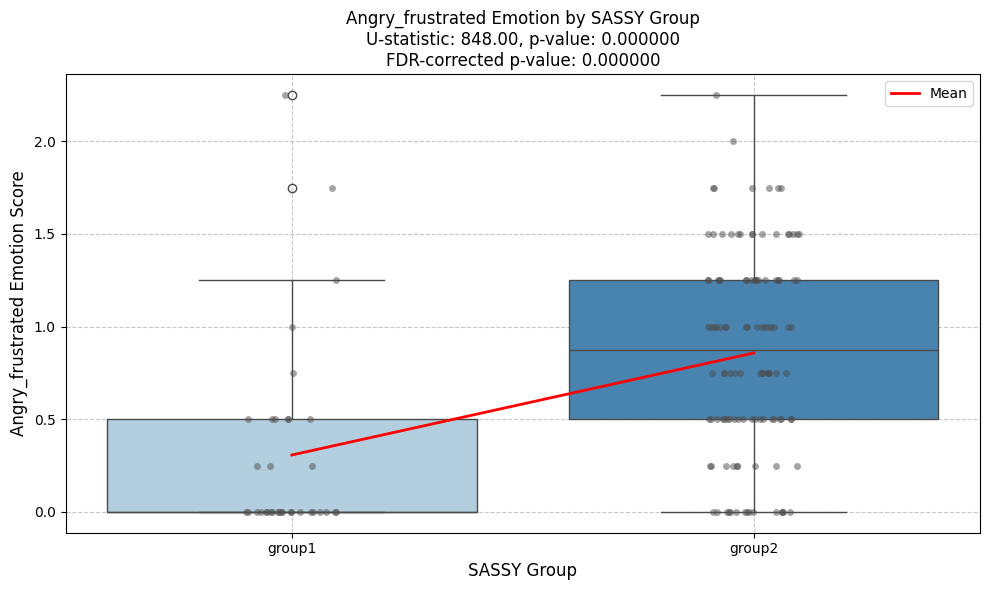

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


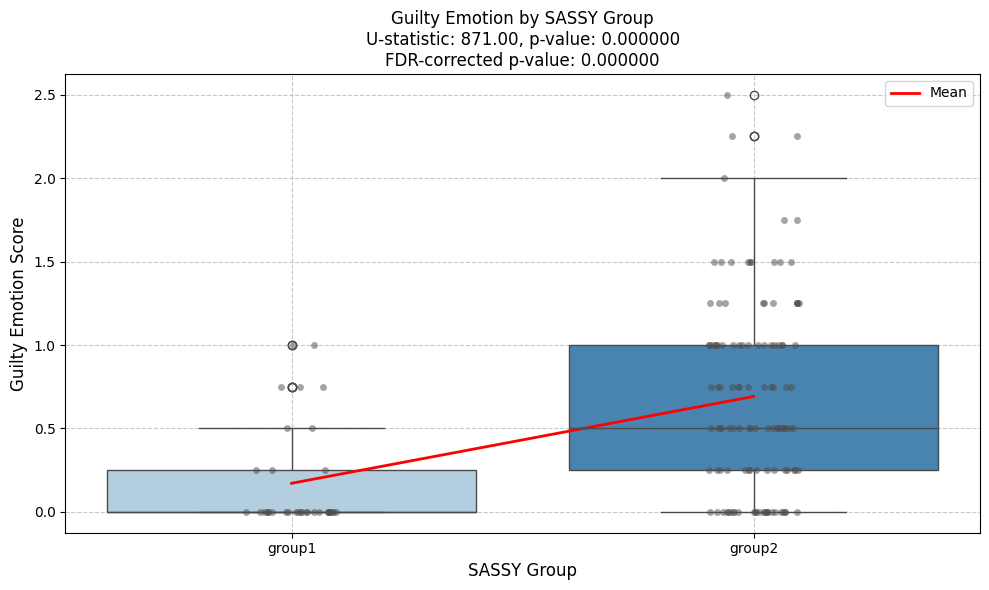

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


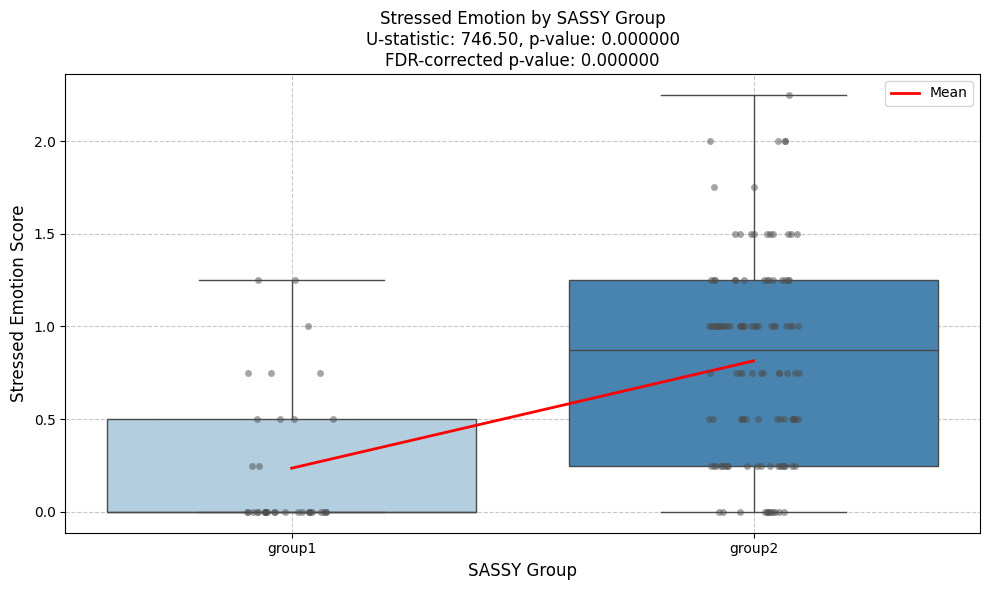

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


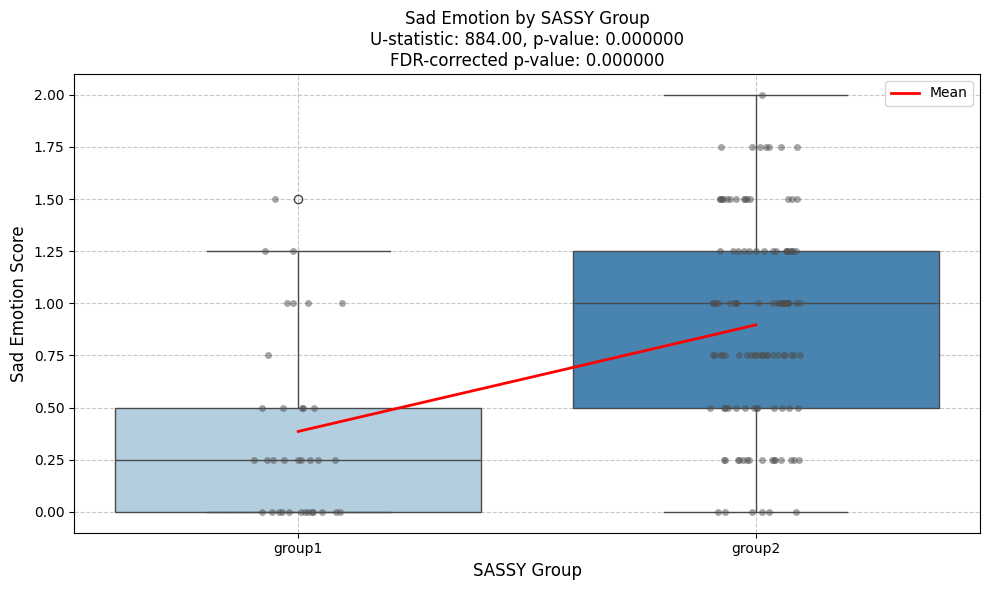

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


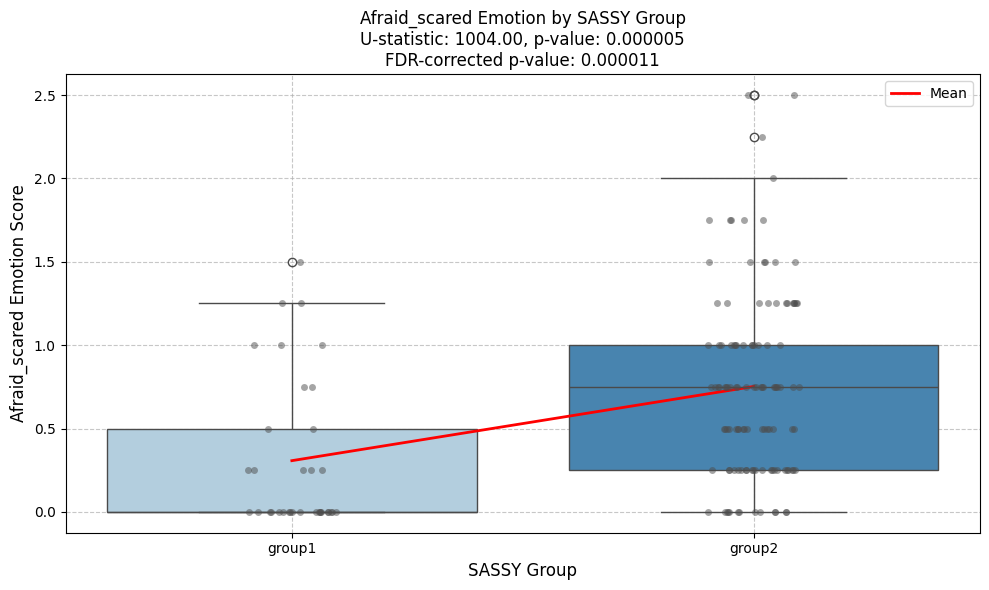

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


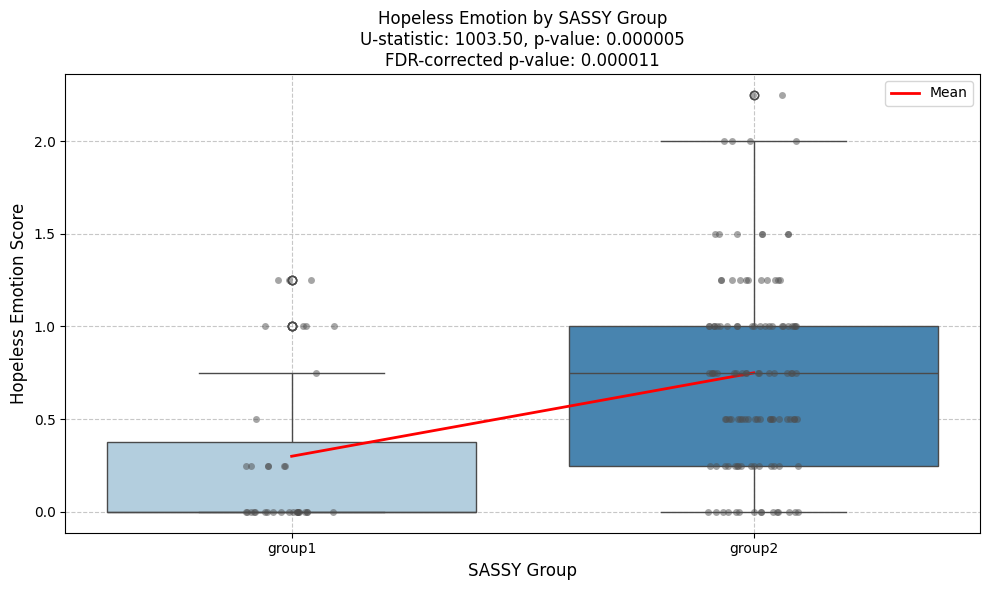

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


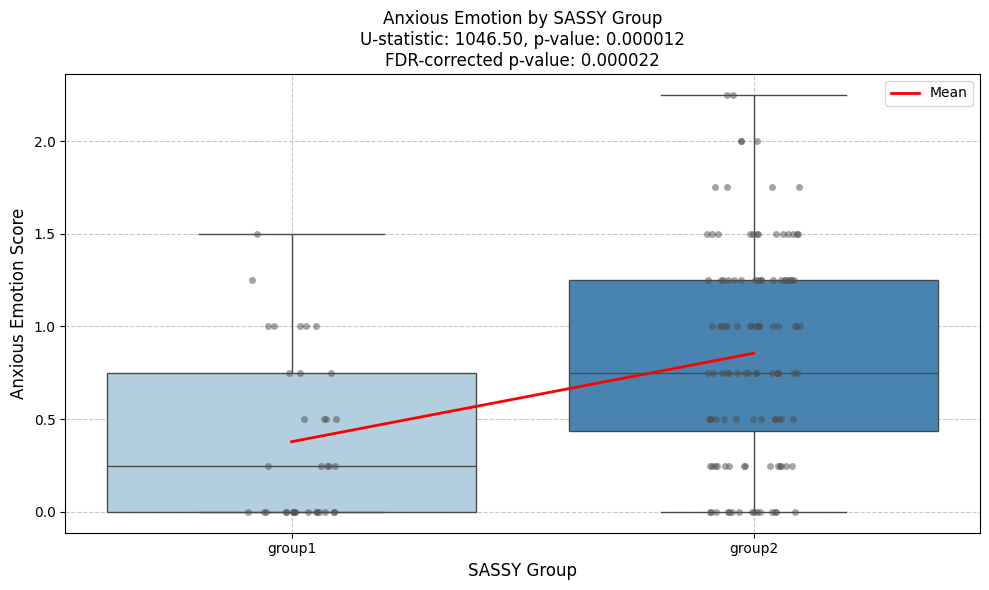

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


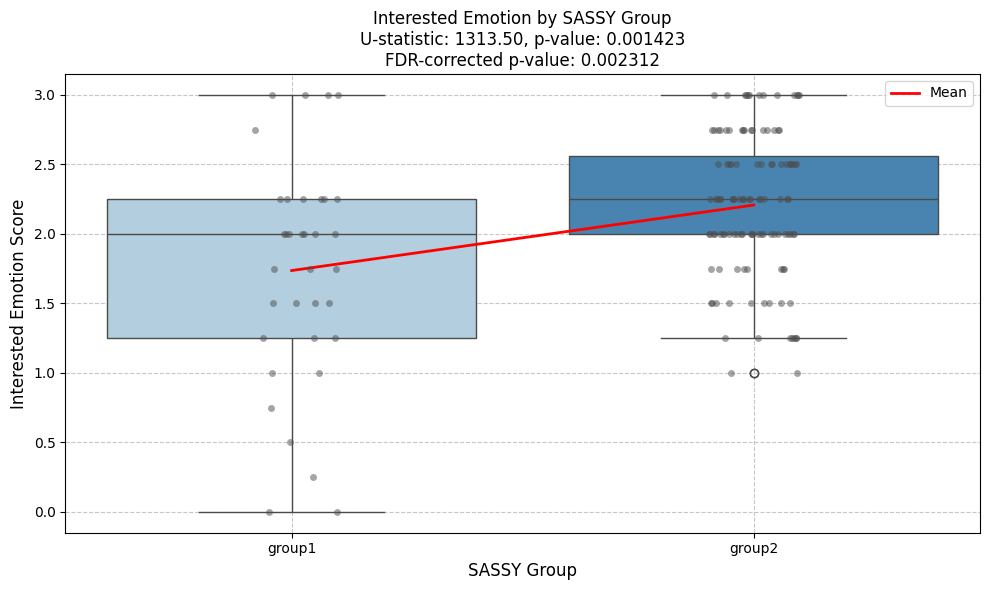

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


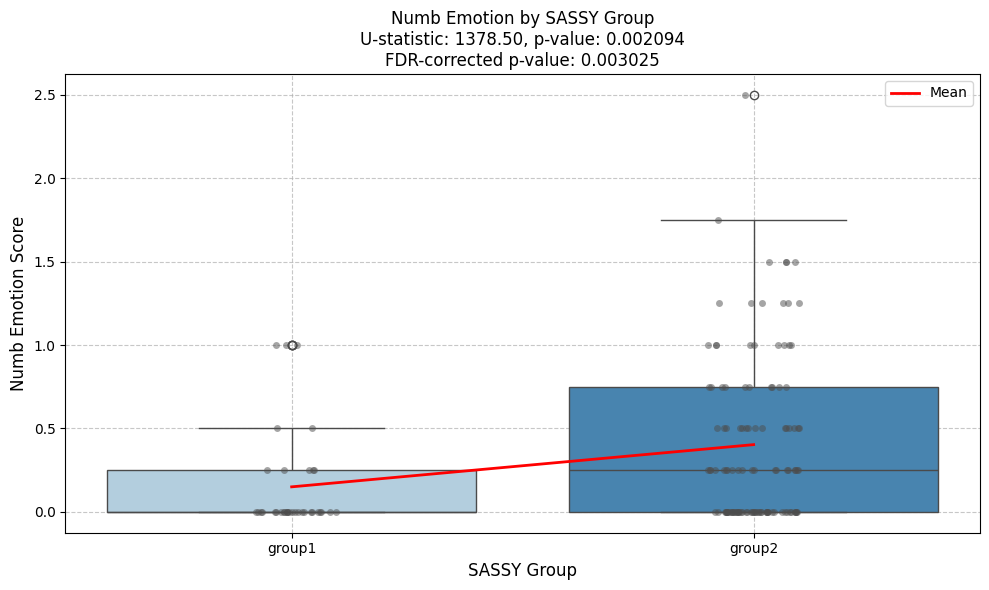

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


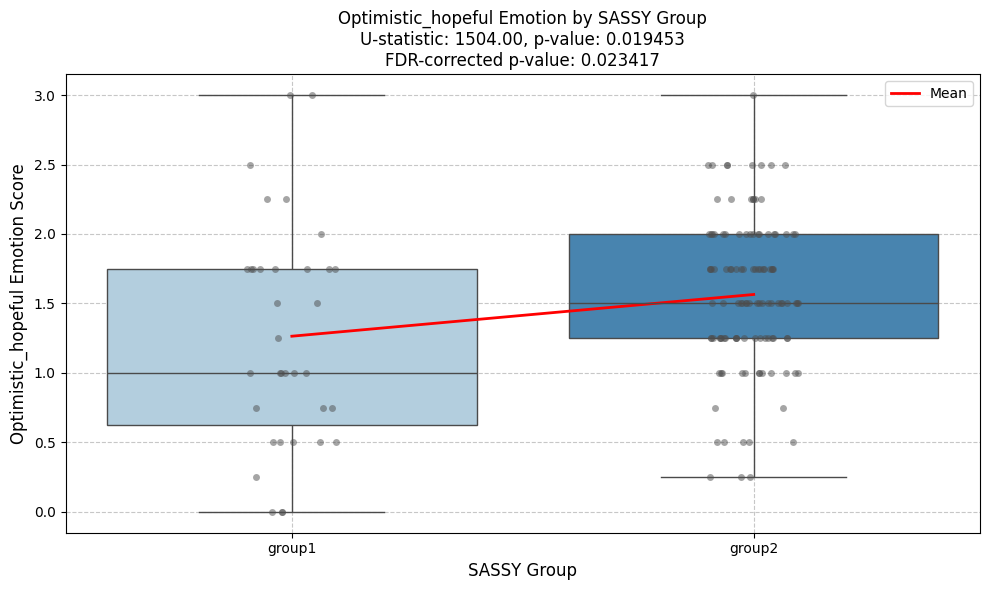

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


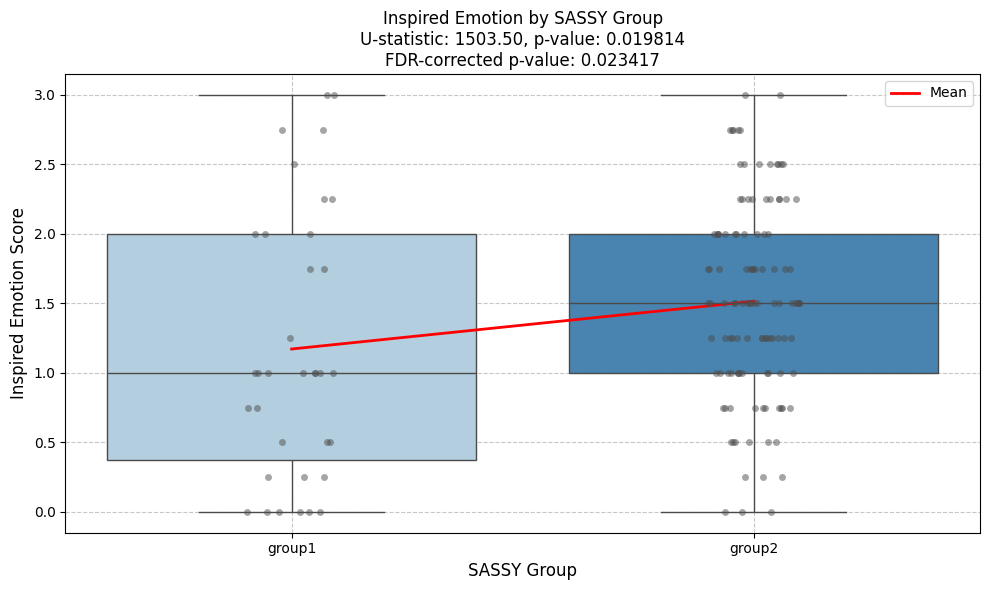

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


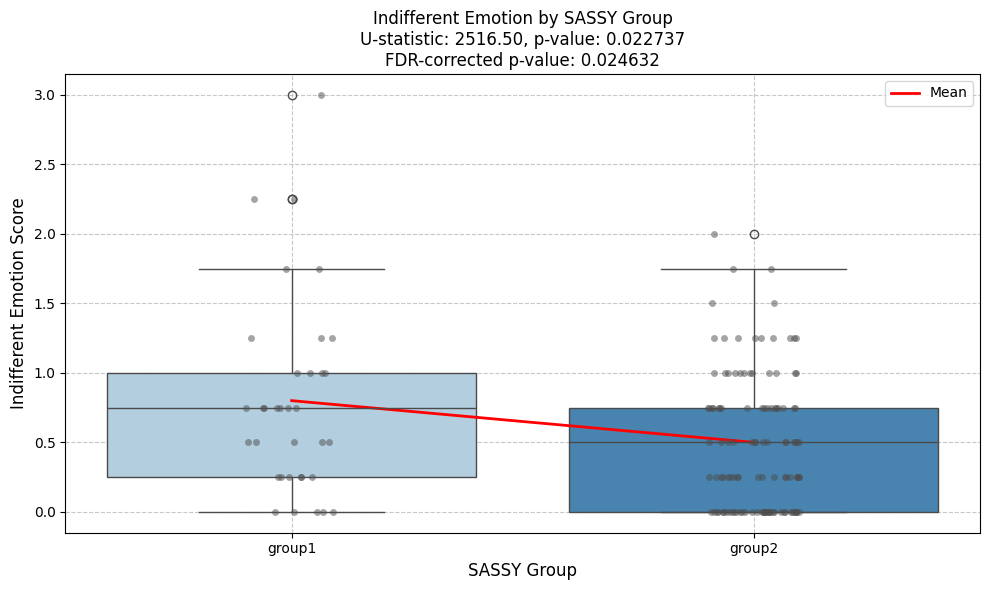

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\3537604000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=emotion, data=data,


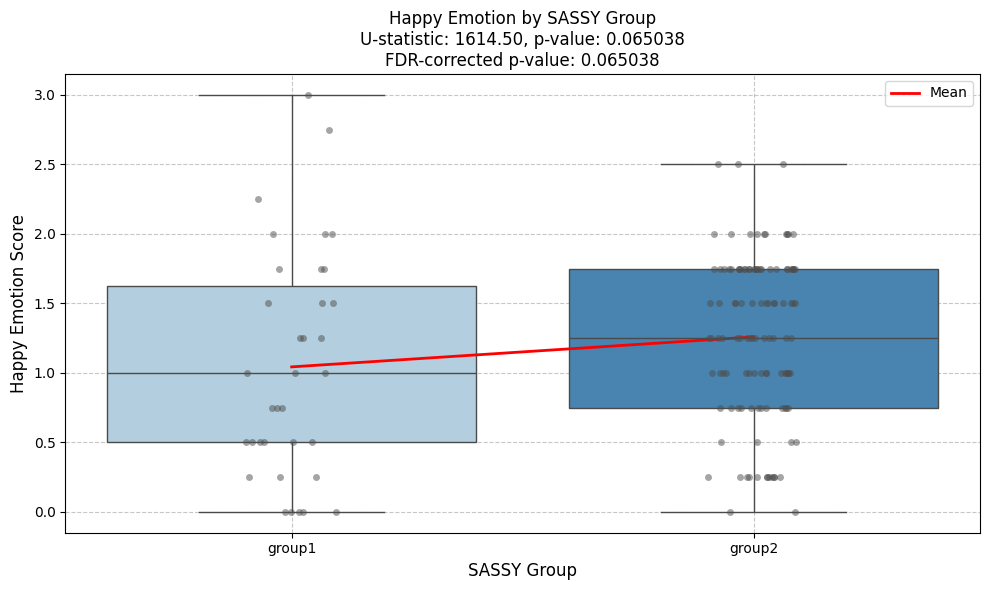

In [15]:
#Plot all results with SASSY as two groups
# Create a function to plot the results for each emotion
def plot_emotion_comparison(emotion, data, group1, group2):
    plt.figure(figsize=(10, 6))
    
    # Create box plot
    ax = sns.boxplot(x='group', y=emotion, data=data,
                     order=['group1', 'group2'],
                     palette='Blues')
    
    # Add individual data points
    sns.stripplot(x='group', y=emotion, data=data,
                  order=['group1', 'group2'],
                  jitter=True, size=5, color='0.3', alpha=0.5)
    
    # Calculate means
    means = data.groupby('group')[emotion].mean()
    x_positions = range(len(means))
    plt.plot(x_positions, means.values, 'r-', linewidth=2, label='Mean')
    
    # Get Mann-Whitney U test results for this emotion
    result = mann_whitney_results_df[mann_whitney_results_df['emotion'] == emotion].iloc[0]
    
    # Add title with test results
    plt.title(f'{emotion.capitalize()} Emotion by SASSY Group\n'
              f'U-statistic: {result["u_statistic"]:.2f}, '
              f'p-value: {result["p_value"]:.6f}\n'
              f'FDR-corrected p-value: {result["corrected_p"]:.6f}',
              fontsize=12)
    
    # Label axes
    plt.xlabel('SASSY Group', fontsize=12)
    plt.ylabel(f'{emotion.capitalize()} Emotion Score', fontsize=12)
    
    # Add legend and grid
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Prepare the data for plotting
plot_data = emotions_mean_by_ida.copy()
plot_data['group'] = plot_data['SASSY'].apply(
    lambda x: 'group1' if x in group1 else ('group2' if x in group2 else None)
)
plot_data = plot_data.dropna(subset=['group'])

# Plot each significant emotion
for emotion in mann_whitney_results_df['emotion']:
    plot_emotion_comparison(emotion, plot_data, group1, group2)

In [16]:
#Run Spearman's test with Dismissive/Doubtful combined and apply FDR correction

# Create combined SASSY categories
emotions_mean_by_ida['SASSY_combined'] = emotions_mean_by_ida['SASSY'].apply(
    lambda x: 'Dismissive/Doubtful' if x in ['Dismissive', 'Doubtful'] else x
)

# Set SASSY_combined order
emotions_mean_by_ida['SASSY_combined'] = pd.Categorical(
    emotions_mean_by_ida['SASSY_combined'],
    categories=['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
    ordered=True
)

# Run spearman test on SASSY vs average emotions with combined Dismissive/Doubtful group
spearman_results_combined = []
for emotion in emotion_cols:
    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY_combined']].dropna()
    
    # Convert to categorical codes
    data_subset['SASSY_combined'] = data_subset['SASSY_combined'].cat.codes

    # Perform Spearman rank correlation test
    spearman_corr, spearman_p = stats.spearmanr(data_subset['SASSY_combined'], data_subset[emotion])
    
    spearman_results_combined.append({
        'emotion': emotion,
        'spearman_corr': spearman_corr,
        'spearman_p': round(spearman_p, 6),  # Round to 6 decimal places
        'significant': spearman_p < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
spearman_results_combined_df = pd.DataFrame(spearman_results_combined)
spearman_results_combined_df = spearman_results_combined_df.sort_values(by='spearman_p')

# Get p-values in the sorted order
p_values = spearman_results_combined_df['spearman_p'].values

# Apply FDR correction
rejected, corrected_p_values = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add corrected p-values to the dataframe
spearman_results_combined_df['corrected_p'] = [round(p, 6) for p in corrected_p_values]
spearman_results_combined_df['significant_fdr'] = rejected

# Display results
display(spearman_results_combined_df)

,emotion,spearman_corr,spearman_p,significant,corrected_p,significant_fdr
1,angry_frustrated,0.462194,0.000000,True,0.000000,True
5,hopeless,0.429090,0.000000,True,0.000000,True
12,stressed,0.418290,0.000000,True,0.000000,True
11,sad,0.448486,0.000000,True,0.000000,True
2,anxious,0.386655,0.000001,True,0.000003,True
0,afraid_scared,0.374425,0.000002,True,0.000004,True
3,guilty,0.367470,0.000003,True,0.000006,True
9,numb,0.252665,0.001748,True,0.002840,True
8,interested,0.232086,0.004137,True,0.005976,True
6,indifferent,-0.147239,0.072172,False,0.093824,False


C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

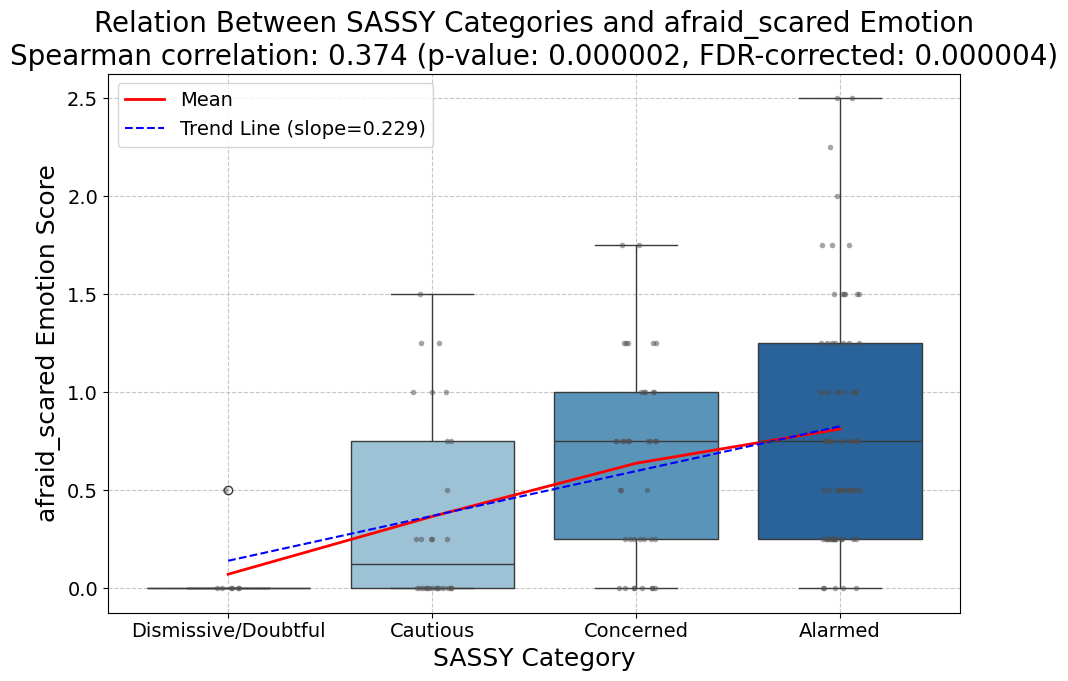

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

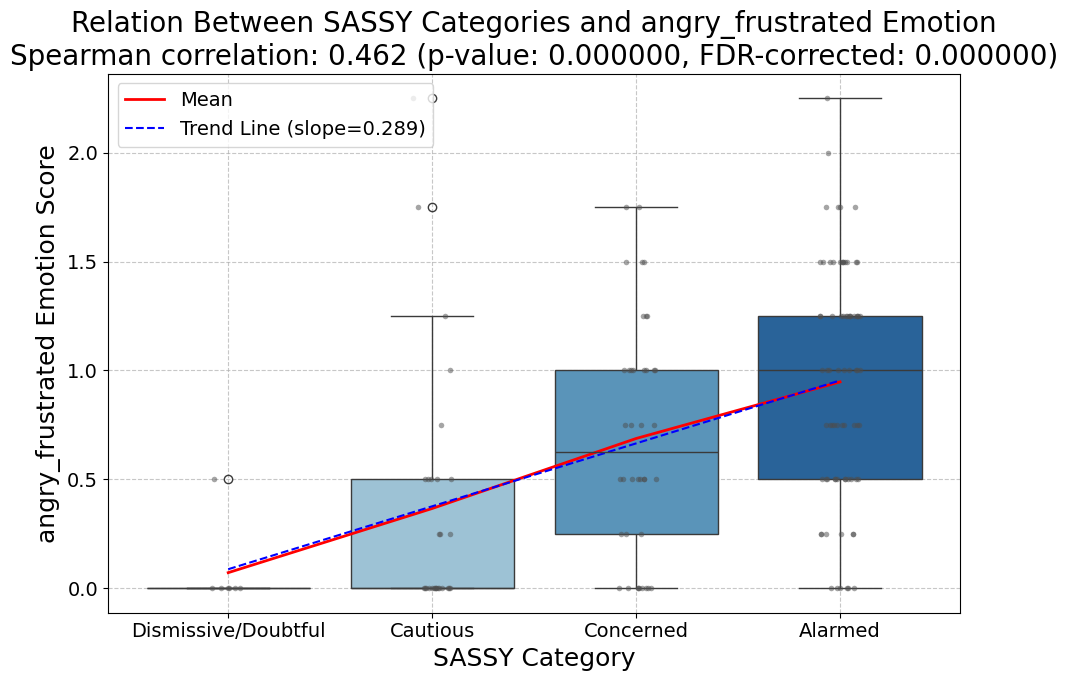

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

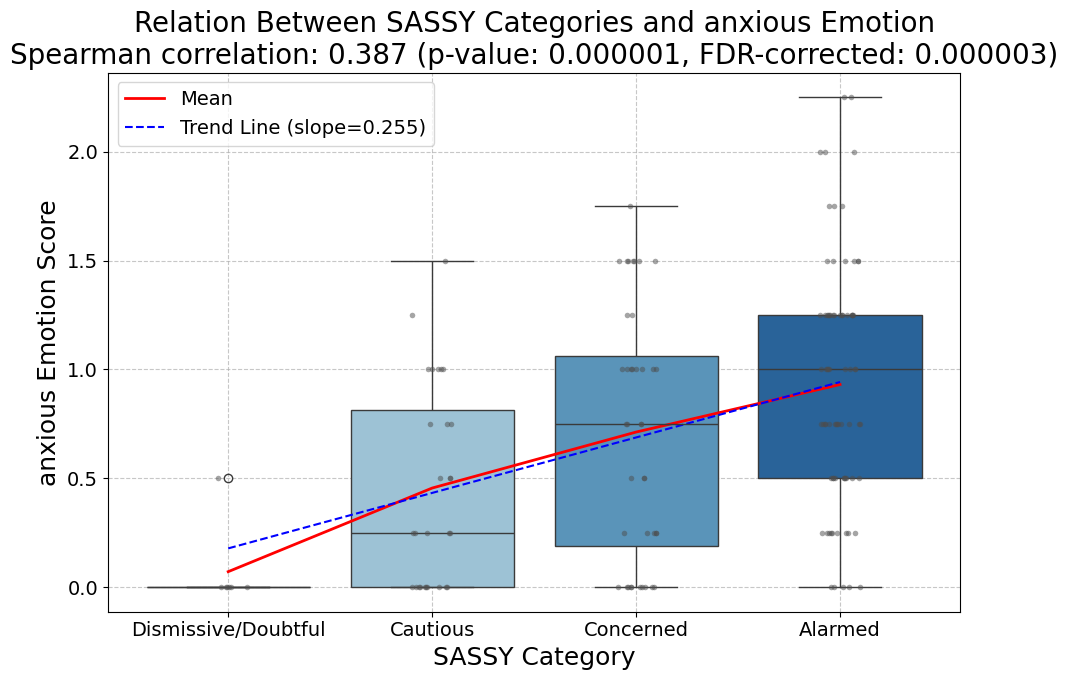

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

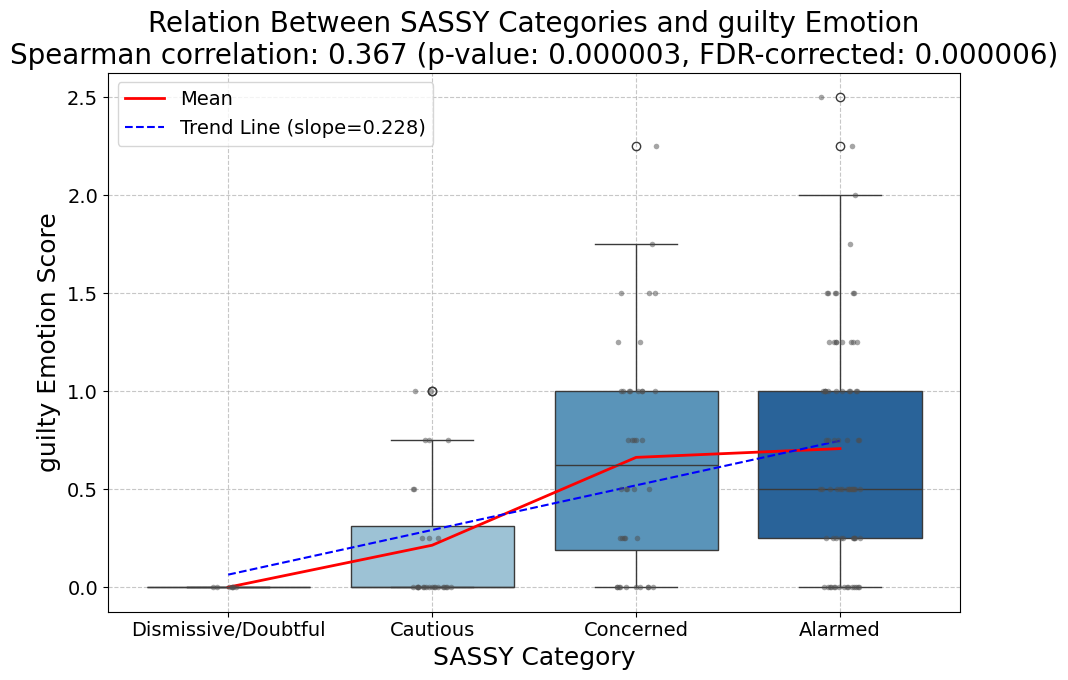

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

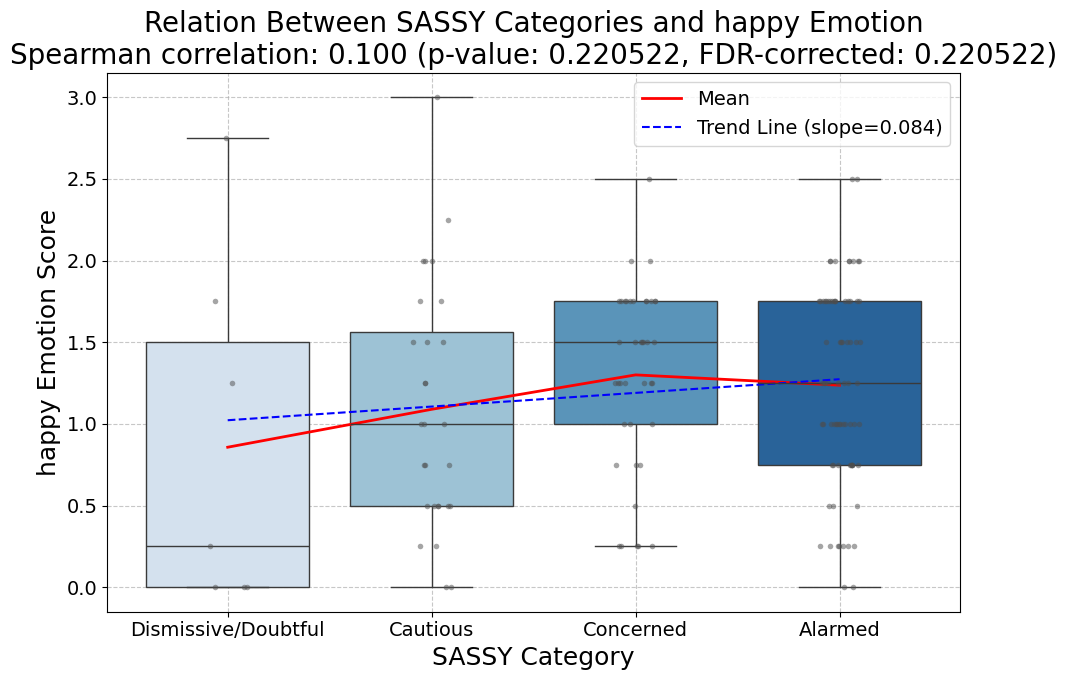

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

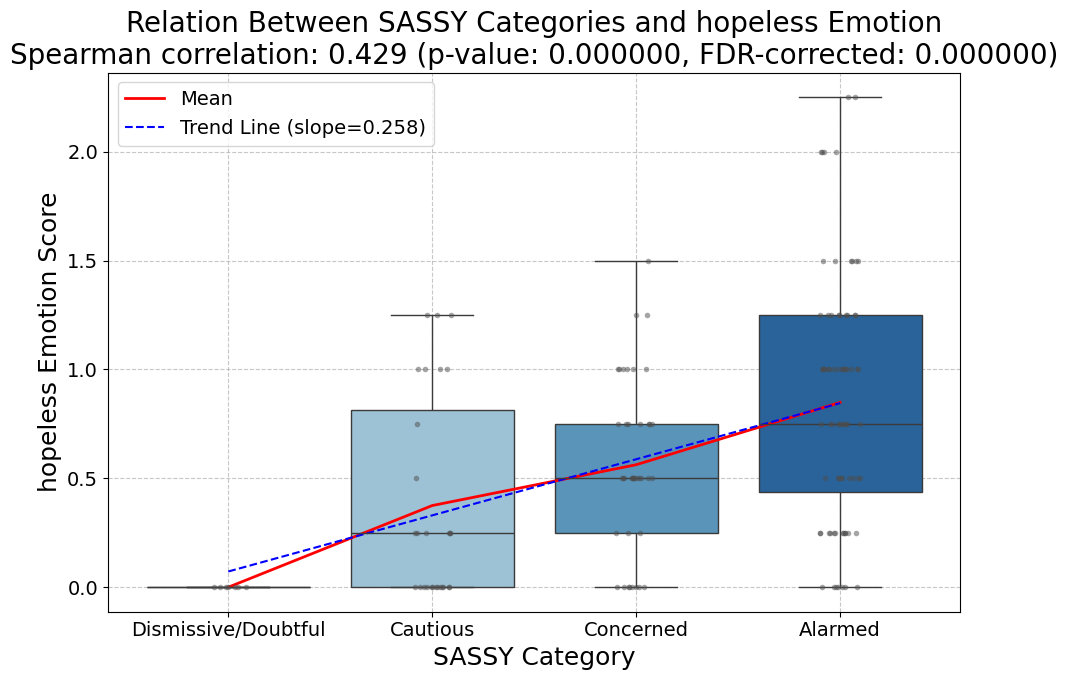

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

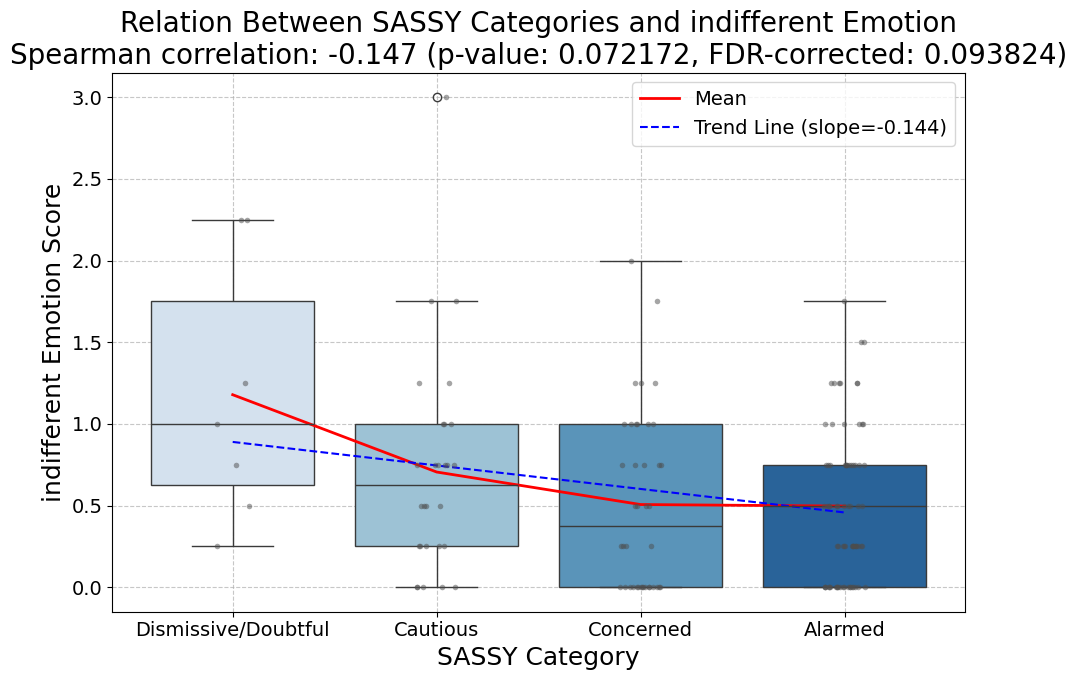

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

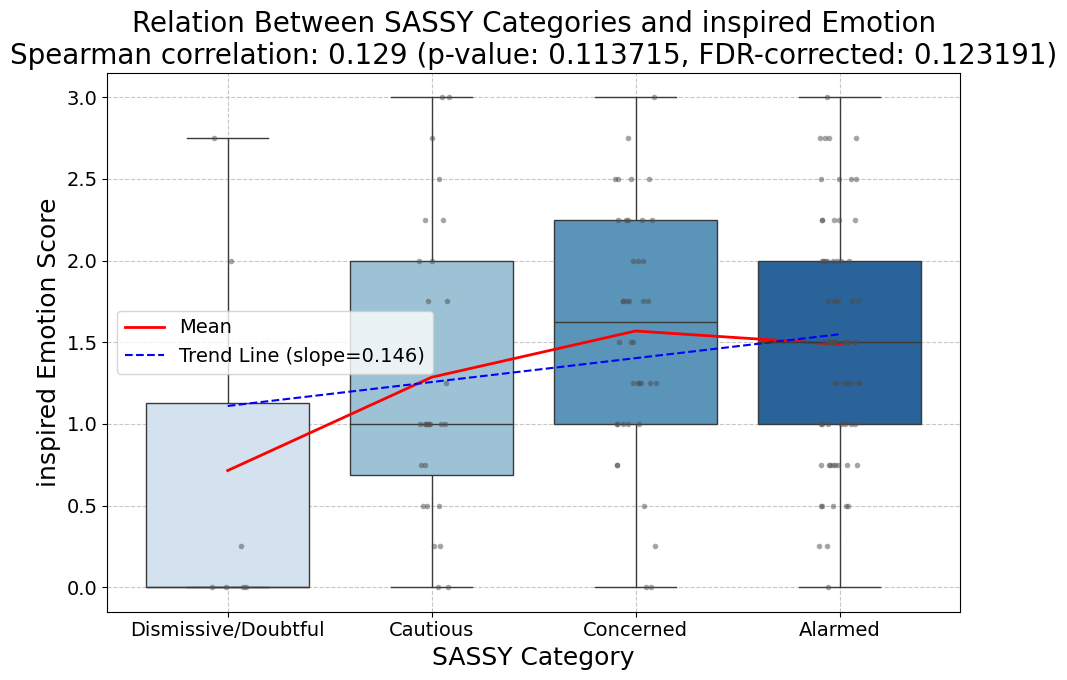

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

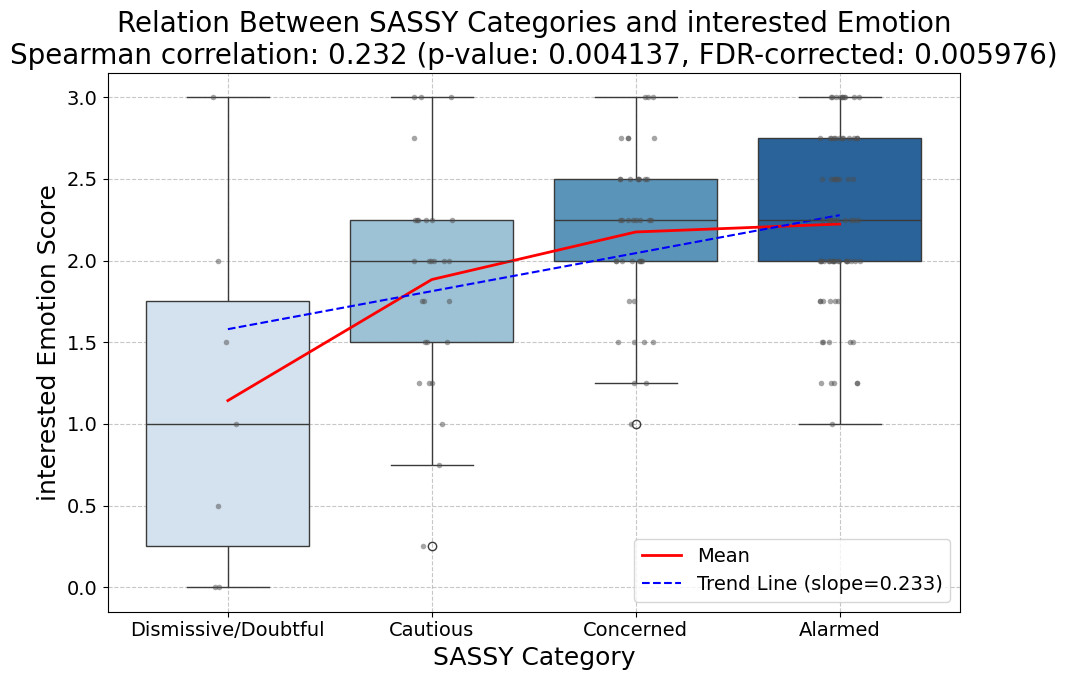

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

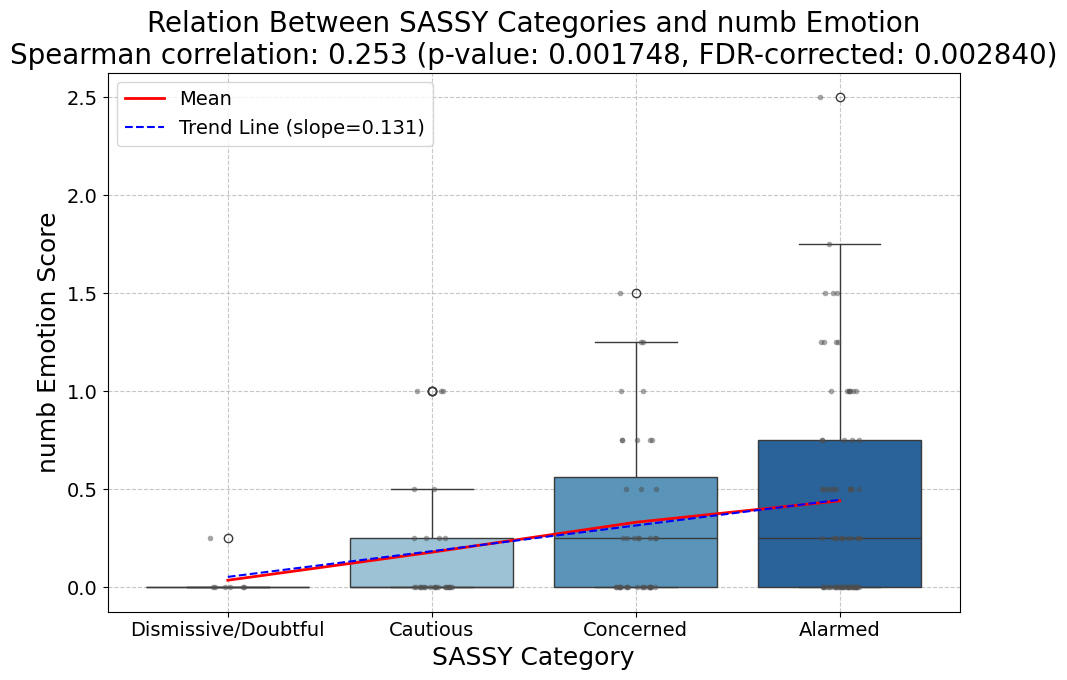

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

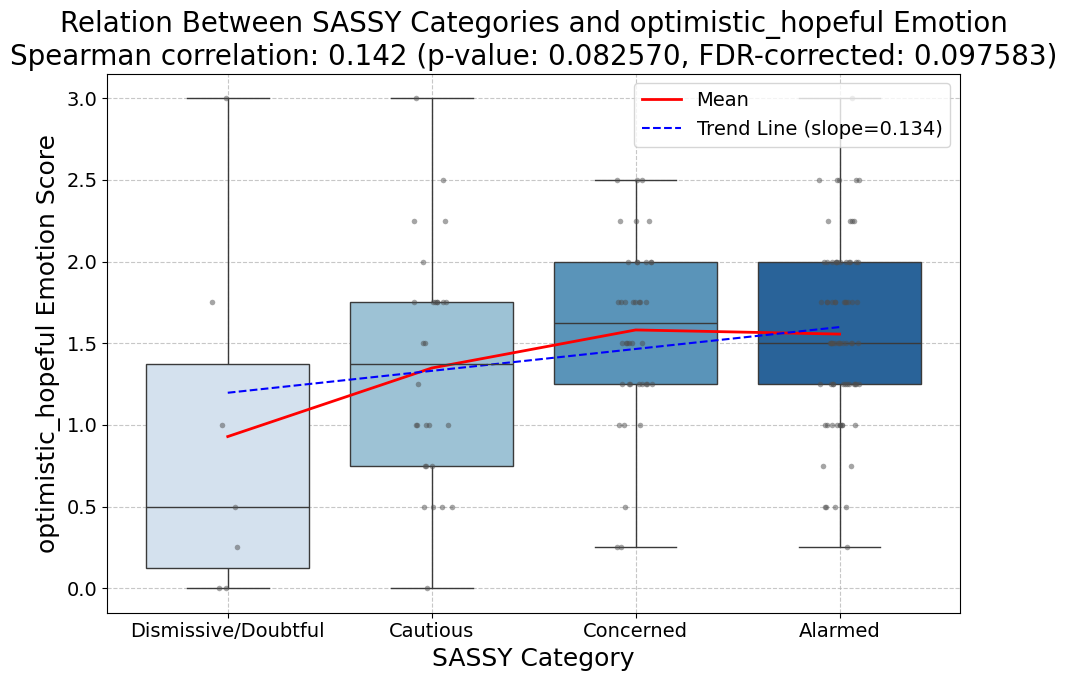

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

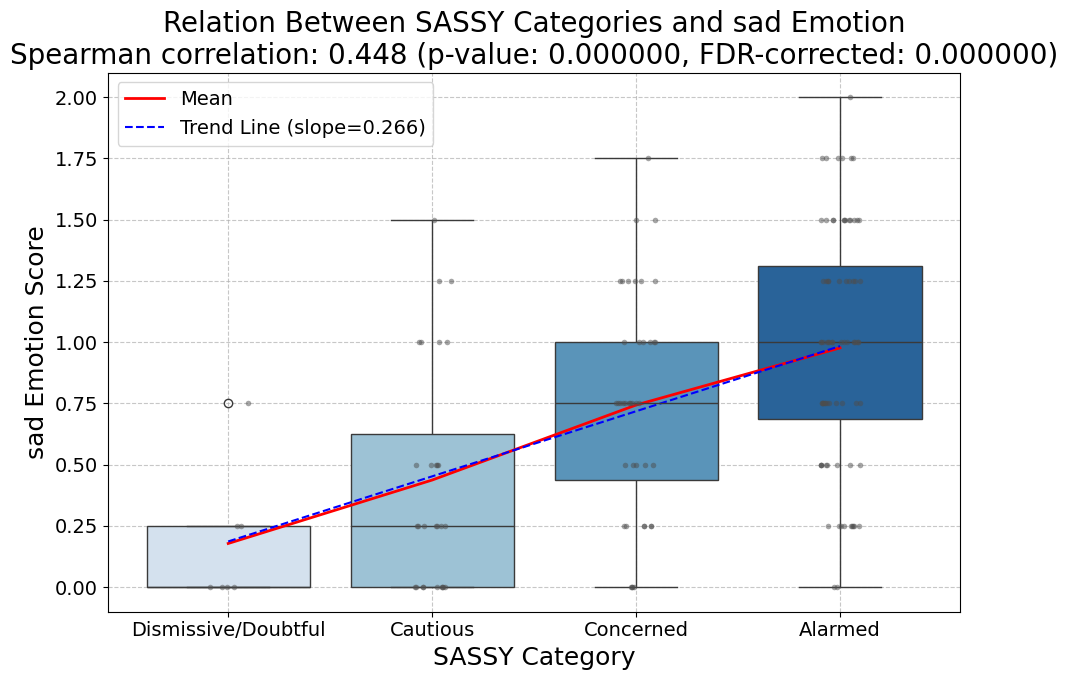

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15232\2283638055.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

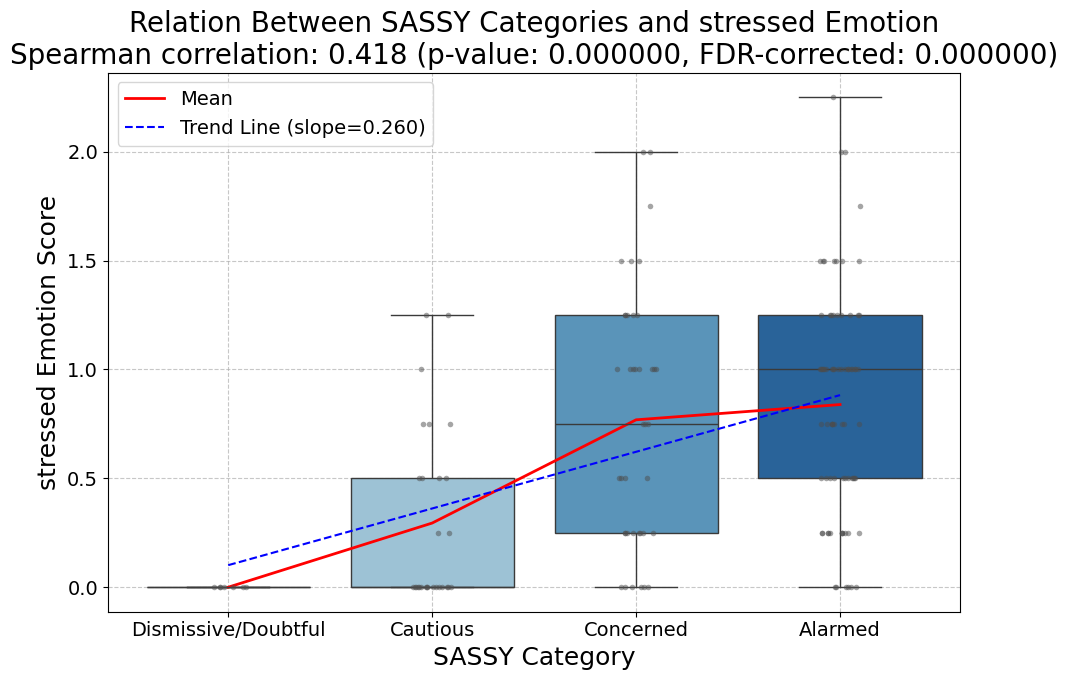

In [17]:
# Plot all emotions vs SASSY with combined Dismissive/Doubtful

# Loop through each emotion to plot
for emotion in emotion_cols:
    # Setup the figure with a larger size for better visibility
    plt.figure(figsize=(11, 7))

    # Create a box plot to show distribution of the current emotion across SASSY categories
    ax = sns.boxplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida, 
                     order=['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                     palette='Blues')

    # Add individual data points for more detail (jittered to avoid overlap)
    sns.stripplot(x='SASSY_combined', y=emotion, data=emotions_mean_by_ida,
                  order=['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                  jitter=True, size=4, color='0.3', alpha=0.5)

    # Calculate the mean for each category to add a line connecting them
    means = emotions_mean_by_ida.groupby('SASSY_combined')[emotion].mean().reindex(['Dismissive/Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
    x_positions = range(len(means))
    plt.plot(x_positions, means.values, 'r-', linewidth=2, label='Mean')

    # Add correlation information to the plot
    corr_value = spearman_results_combined_df[spearman_results_combined_df['emotion'] == emotion]['spearman_corr'].values[0]
    p_value = spearman_results_combined_df[spearman_results_combined_df['emotion'] == emotion]['spearman_p'].values[0]
    corrected_p = spearman_results_combined_df[spearman_results_combined_df['emotion'] == emotion]['corrected_p'].values[0]

    # Add a title with correlation information
    plt.title(f'Relation Between SASSY Categories and {emotion} Emotion\n'
              f'Spearman correlation: {corr_value:.3f} (p-value: {p_value:.6f}, FDR-corrected: {corrected_p:.6f})', 
              fontsize=20)

    # Label the axes
    plt.xlabel('SASSY Category', fontsize=18)
    plt.ylabel(f'{emotion} Emotion Score', fontsize=18)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

    # Add a trend line (regression line)
    # Get numeric codes for categories (0, 1, 2, 3)
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY_combined']].dropna()
    data_subset['SASSY_combined'] = data_subset['SASSY_combined'].cat.codes
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_subset['SASSY_combined'], data_subset[emotion])
    x_line = np.array([0, 1, 2, 3])
    y_line = intercept + slope * x_line
    plt.plot(x_line, y_line, 'b--', label=f'Trend Line (slope={slope:.3f})')

    # Add a legend
    plt.legend(fontsize=14)

    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

### Urban/Rural vs Avg Emotions

In [18]:
# Run spearman test on sassy vs average emots
spearman_results = []
for emotion in emotion_cols:

    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'rural/urban']].dropna()

    # Perform Spearman rank correlation test
    spearman_corr, spearman_p = stats.spearmanr(data_subset['rural/urban'], data_subset[emotion])
    
    spearman_results.append({
        'emotion': emotion,
        'spearman_corr': spearman_corr,
        'spearman_p': round(spearman_p, 6),  # Round to 6 decimal places
        'significant': spearman_p < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
spearman_results_df_urb_rur = pd.DataFrame(spearman_results)
spearman_results_df_urb_rur = spearman_results_df_urb_rur.sort_values(by='spearman_p')
display(spearman_results_df_urb_rur)

,emotion,spearman_corr,spearman_p,significant
9,numb,-0.084639,0.293475,False
7,inspired,0.083611,0.299398,False
5,hopeless,-0.070343,0.382879,False
10,optimistic_hopeful,0.065804,0.414404,False
0,afraid_scared,0.062193,0.440538,False
1,angry_frustrated,-0.053319,0.508565,False
4,happy,0.050250,0.533302,False
11,sad,-0.027755,0.730891,False
3,guilty,0.016993,0.833236,False
2,anxious,0.014765,0.854845,False


### UT vs Avg Emotions

In [19]:
# Mann-Whitney U test to compare emotions between Utah and non-utah residents
mw_ut_results = []
for emotion in emotion_cols:

    #Get emotion scores for ut and non ut
    ut_scores = emotions_mean_by_ida.loc[emotions_mean_by_ida['UT?'] == 1.0, emotion].dropna()
    non_ut_scores = emotions_mean_by_ida.loc[emotions_mean_by_ida['UT?'] == 0.0, emotion].dropna()
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(ut_scores, non_ut_scores, alternative='two-sided')
    
    mw_ut_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

mw_ut_results_df = pd.DataFrame(mw_ut_results)
display(mw_ut_results_df)

,emotion,statistic,p_value,significant
0,afraid_scared,2758.0,0.531252,False
1,angry_frustrated,2779.0,0.583066,False
2,anxious,2682.0,0.367240,False
3,guilty,2583.0,0.199270,False
4,happy,3041.0,0.686123,False
5,hopeless,2934.5,0.986844,False
6,indifferent,3136.5,0.377792,False
7,inspired,2875.5,0.846073,False
8,interested,3077.0,0.591935,False
9,numb,2734.5,0.448566,False
